In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
immo_H_clean = pd.read_csv('../data/cleaned/immo_house_not_outliers.csv')
immo_AP_clean = pd.read_csv('../data/cleaned/immo_apartment_not_outliers.csv')

immo_H_clean.head()

Price  Facades  Habitable Surface   Type  Bedroom Count  Bathroom Count  \
0  269000      2.0         178.000000  HOUSE            4.0             1.0   
1   99000      4.0          33.000000  HOUSE            1.0             1.0   
2  584000      3.0         284.000000  HOUSE            4.0             1.0   
3  299000      3.0         205.541958  HOUSE            3.0             1.0   
4  380600      3.0         209.000000  HOUSE            3.0             1.0   

   Toilet Count  Room Count  Kitchen Type  Furnished  Terrace  \
0           2.0         5.0           3.0          0        0   
1           1.0         3.0           1.0          0        1   
2           2.0         7.0           1.0          0        0   
3           1.0         4.0           1.0          0        0   
4           2.0         6.0           1.0          0        0   

   Terrace Surface  State of Building  Living Surface  EPC  \
0        21.915179                3.0       32.000000  5.0   
1         6.000000                3.0       36.465753  4.0   
2        21.915179                1.0       36.465753  4.0   
3        21.915179                2.0       41.000000  1.0   
4        21.915179                3.0       41.000000  4.0   

   Consumption Per m2       Municipality   Province  APARTMENT  HOUSE  
0          107.000000           TURNHOUT  ANTWERPEN          0      1  
1          371.896623              LILLE  ANTWERPEN          0      1  
2          371.896623             BORNEM  ANTWERPEN          0      1  
3          519.000000  HEIST-OP-DEN-BERG  ANTWERPEN          0      1  
4          371.896623            LAAKDAL  ANTWERPEN          0      1

In [3]:
immo_AP_clean

Price  Facades  Habitable Surface       Type  Bedroom Count  \
0     175000      2.0               90.0  APARTMENT            2.0   
1     249000      2.0               83.0  APARTMENT            1.0   
2     265000      3.0               82.0  APARTMENT            1.0   
3     269000      3.0               82.0  APARTMENT            1.0   
4     299000      3.0               94.0  APARTMENT            2.0   
...      ...      ...                ...        ...            ...   
7107  565000      2.0               72.0  APARTMENT            2.0   
7108  239000      2.0               84.0  APARTMENT            2.0   
7109  369000      2.0               80.0  APARTMENT            2.0   
7110  269000      2.0               45.0  APARTMENT            1.0   
7111  475000      4.0              101.0  APARTMENT            3.0   

      Bathroom Count  Toilet Count  Room Count  Kitchen Type  Furnished  \
0                1.0           1.0         4.0           1.0          0   
1                1.0           1.0         3.0           1.0          0   
2                1.0           1.0         3.0           1.0          0   
3                1.0           1.0         3.0           1.0          0   
4                1.0           1.0         4.0           1.0          0   
...              ...           ...         ...           ...        ...   
7107             1.0           1.0         4.0           1.0          0   
7108             1.0           1.0         4.0           1.0          0   
7109             1.0           1.0         4.0           1.0          0   
7110             1.0           1.0         2.0           1.0          0   
7111             1.0           1.0         4.0           1.0          0   

      Terrace  Terrace Surface  State of Building  Living Surface  EPC  \
0           1         7.000000                3.0       37.000000  5.0   
1           1         2.000000                3.0       41.000000  5.0   
2           1        13.000000                3.0       42.000000  5.0   
3           1         8.000000                3.0       35.000000  5.0   
4           1        13.000000                3.0       29.000000  5.0   
...       ...              ...                ...             ...  ...   
7107        1        21.578797                3.0       34.267442  7.0   
7108        0        21.578797                3.0       34.267442  5.0   
7109        1         5.000000                5.0       34.267442  5.0   
7110        1        21.578797                3.0       34.267442  4.0   
7111        1        10.000000                3.0       34.267442  5.0   

      Consumption Per m2  Municipality         Province  APARTMENT  HOUSE  
0             124.000000     ANTWERPEN        ANTWERPEN          1      0  
1             188.000000       MORTSEL        ANTWERPEN          1      0  
2             196.697603    HERENTHOUT        ANTWERPEN          1      0  
3             196.697603    HERENTHOUT        ANTWERPEN          1      0  
4             196.697603    HERENTHOUT        ANTWERPEN          1      0  
...                  ...           ...              ...        ...    ...  
7107          100.000000  KNOKKE-HEIST  WEST-VLAANDEREN          1      0  
7108          124.000000  BLANKENBERGE  WEST-VLAANDEREN          1      0  
7109          174.000000      OOSTENDE  WEST-VLAANDEREN          1      0  
7110          259.000000      KOKSIJDE  WEST-VLAANDEREN          1      0  
7111          185.293879    NIEUWPOORT  WEST-VLAANDEREN          1      0  

[7112 rows x 20 columns]

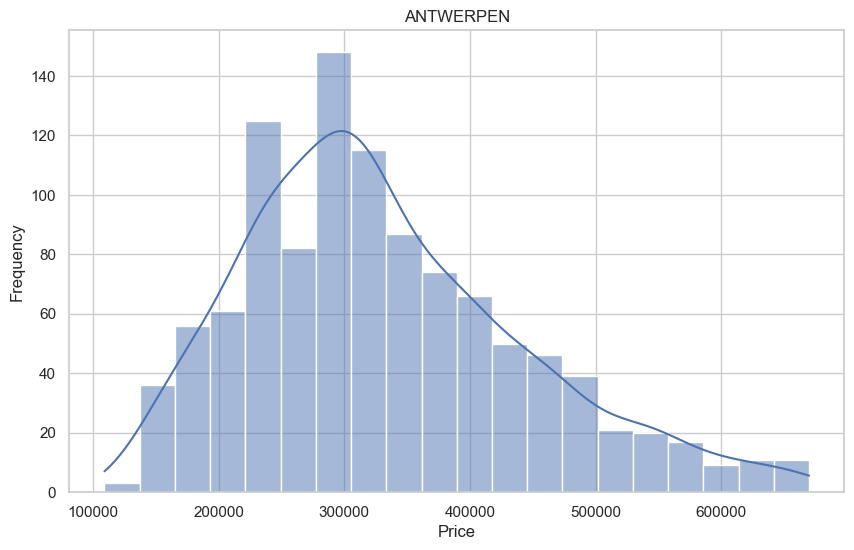

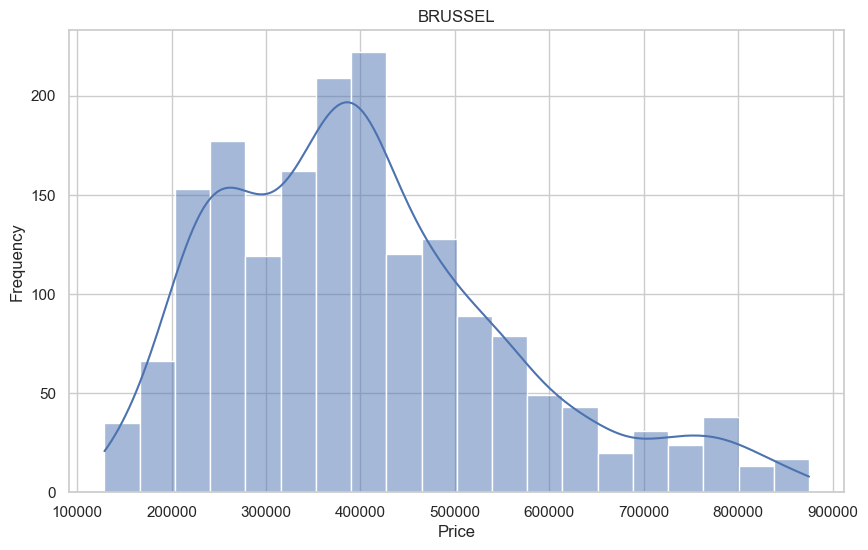

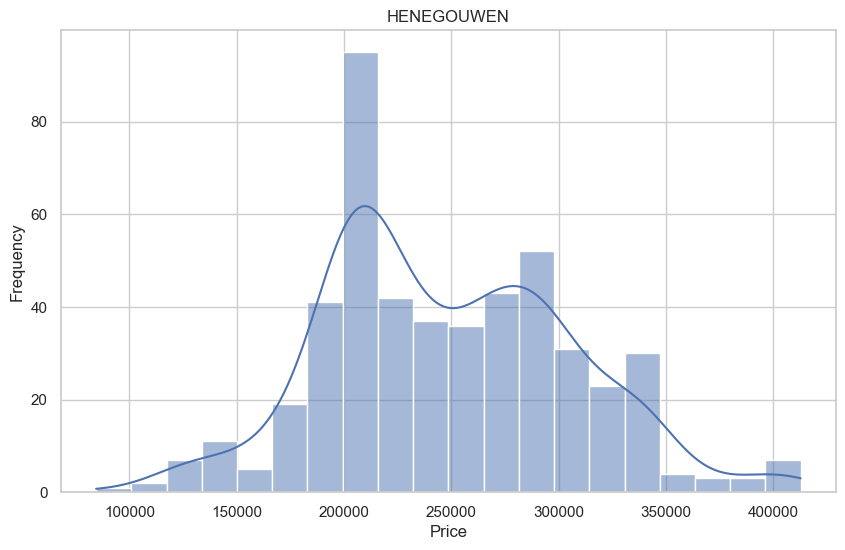

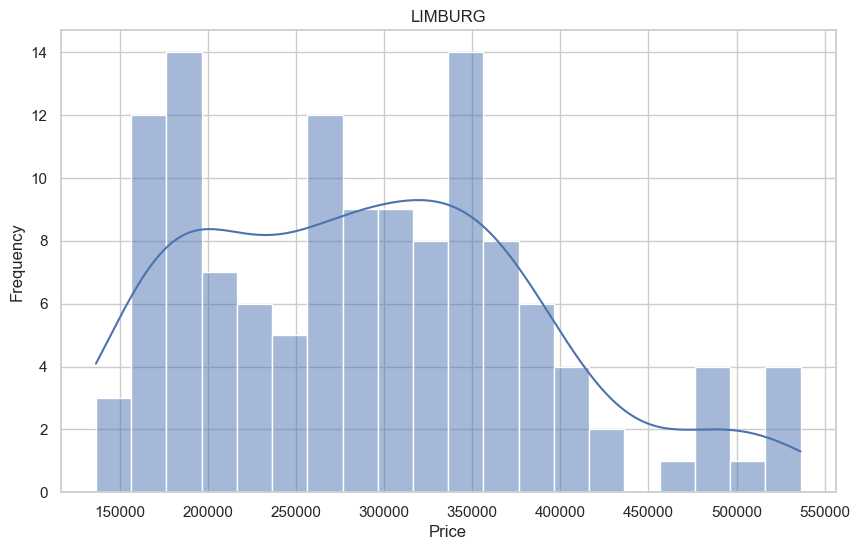

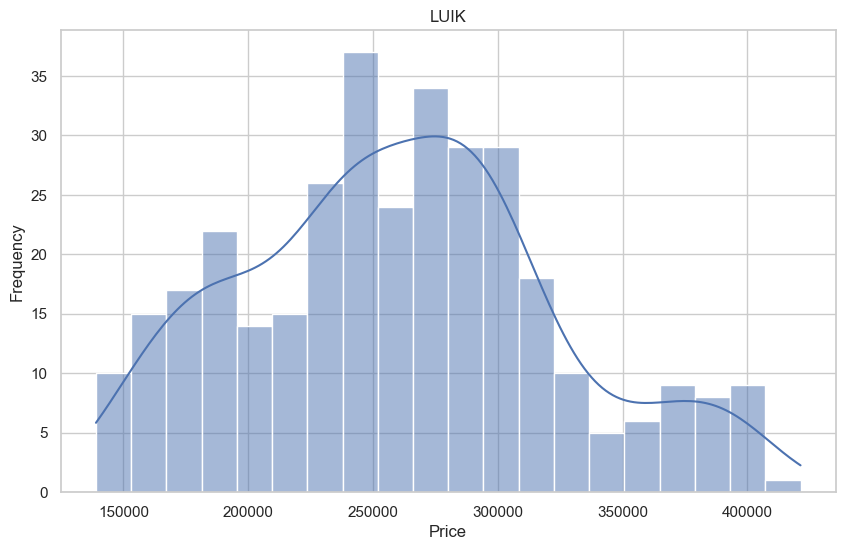

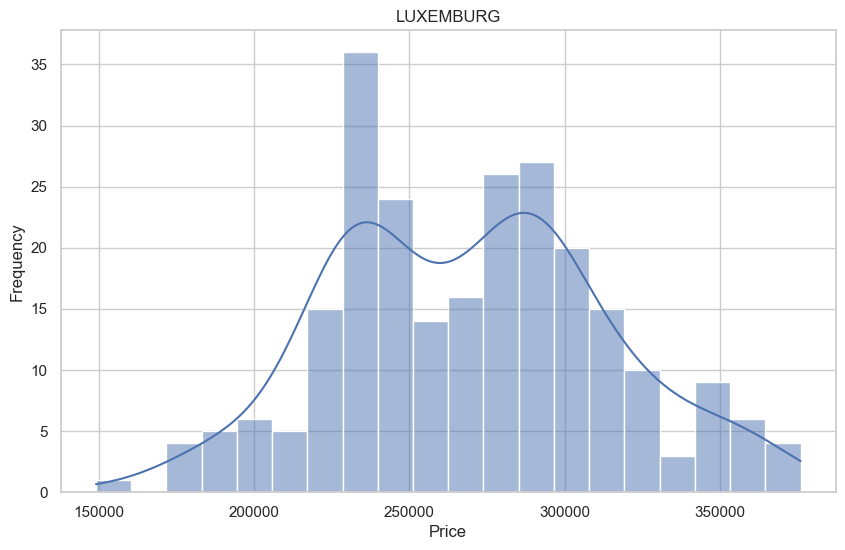

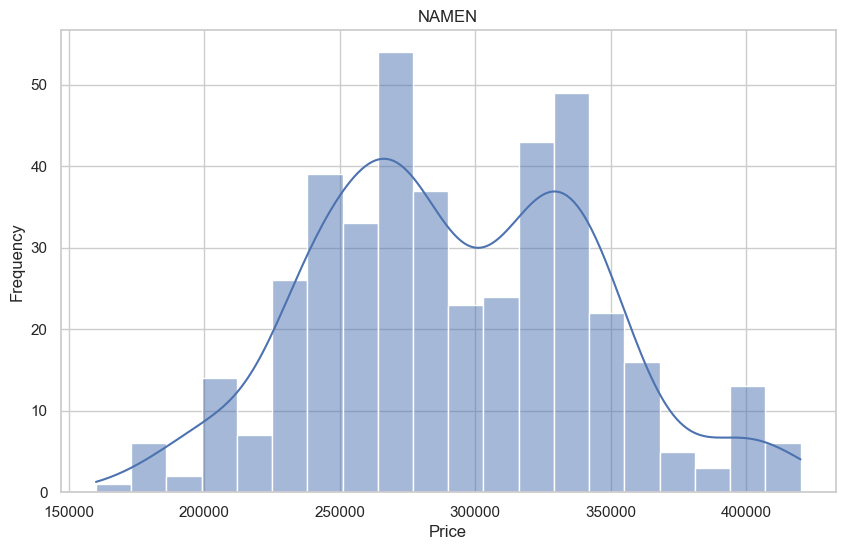

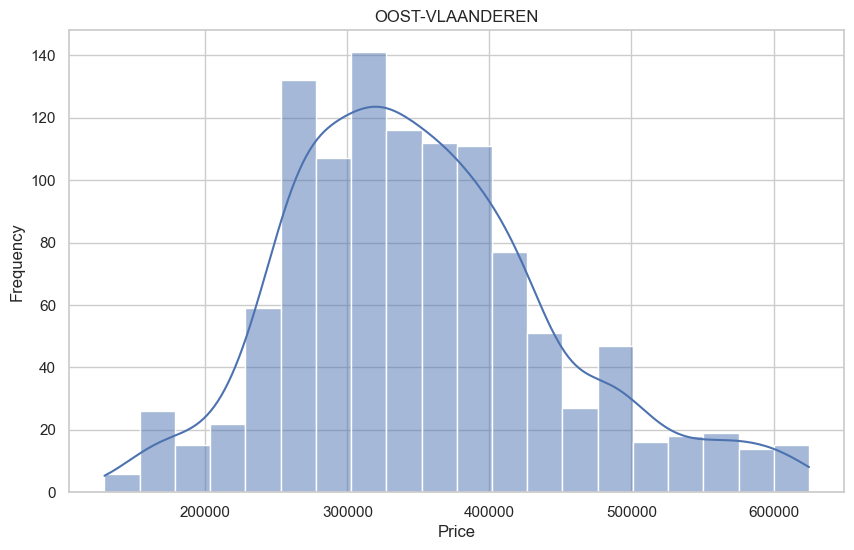

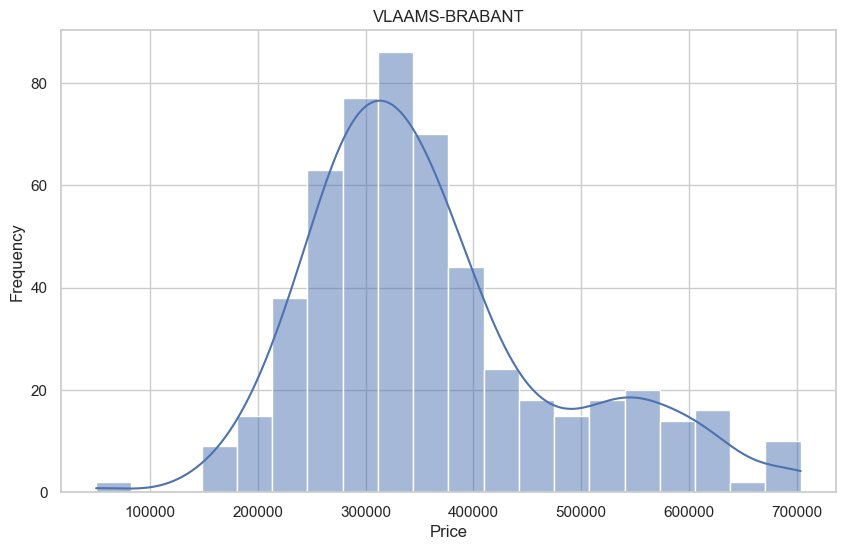

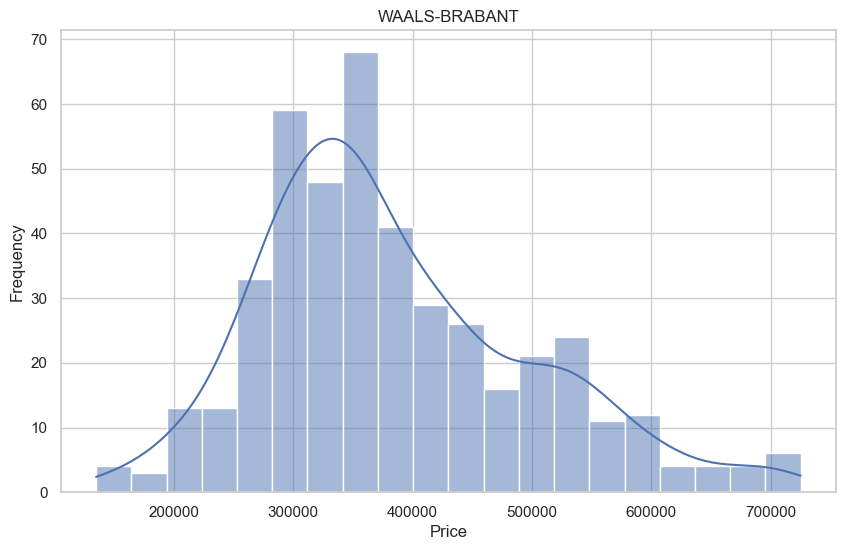

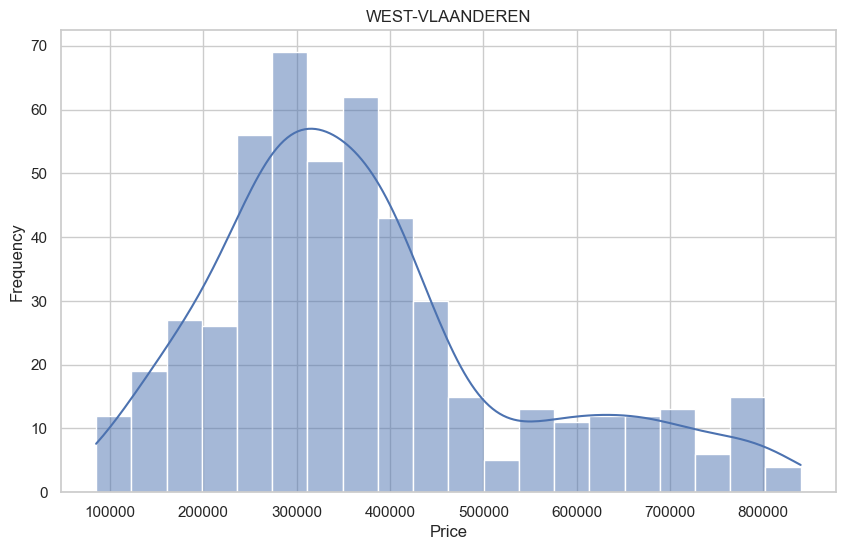

In [4]:
for prov in immo_AP_clean.Province.unique():
    region_price = immo_AP_clean[immo_AP_clean['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    
    plt.show()  

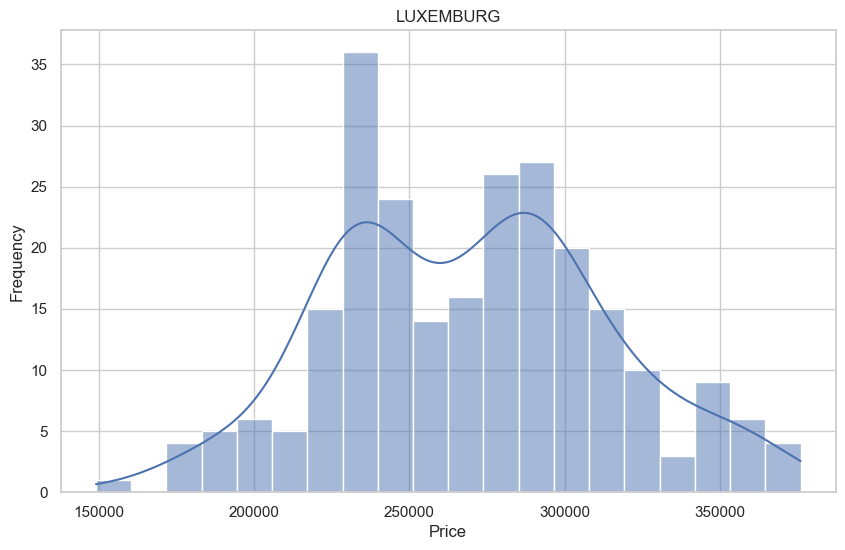

In [5]:
# Take LUXEMBURG for exploratory analysis
    
region_price = immo_AP_clean[immo_AP_clean['Province'] == 'LUXEMBURG']['Price']
sns.set(style="whitegrid")
    
plt.figure(figsize=(10, 6))
sns.histplot(region_price, bins=20, kde=True)


plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('LUXEMBURG')

plt.show()

In [6]:
# Calculating the two modes for provinces

mode_indexes = {}
modes = {}

for prov in immo_AP_clean.Province.unique():

    frequencies, borders = np.histogram(immo_AP_clean[immo_AP_clean['Province'] == prov]['Price'], bins=10)  
    
    mode_indexes[prov] = frequencies.argsort()[-2:][::-1]
    modes[prov] = borders[mode_indexes[prov]]

print("The two modes:", modes)

The two modes: {'ANTWERPEN': array([277300., 221200.]), 'BRUSSEL': array([352800., 203600.]), 'HENEGOUWEN': array([183005.3, 281510.6]), 'LIMBURG': array([336364. , 256375.6]), 'LUIK': array([223679.2, 280132. ]), 'LUXEMBURG': array([217100., 285200.]), 'NAMEN': array([316000., 264000.]), 'OOST-VLAANDEREN': array([277800., 327400.]), 'VLAAMS-BRABANT': array([311400., 246050.]), 'WAALS-BRABANT': array([312000., 253000.]), 'WEST-VLAANDEREN': array([236000., 311500.])}


In [7]:
def two_modes(df: pd.DataFrame) -> dict:
    mode_indexes = {}
    modes = {}
    for prov in df.Province.unique():
        frequencies, borders = np.histogram(df[df['Province'] == prov]['Price'], bins=10)
        mode_indexes[prov] = frequencies.argsort()[-2:][::-1]
        modes[prov] = borders[mode_indexes[prov]]
    return modes


def range_around_two_modes(df: pd.DataFrame, modes: dict) -> pd.DataFrame:
    around_mode_ranges = {}
    modes_range_df = df.copy()
    modes_range_df['higher_occurrence'] = 0
    modes_range_df['lower_occurrence'] = 1
    
    for prov, two_modes in modes.items():
        around_mode_ranges[prov] = {'r1_left': two_modes[0] - 50000, 'r1_right': two_modes[0] + 50000, 'r2_left': two_modes[1] - 50000, 'r2_right': two_modes[1] + 50000}
        r1_left = two_modes[0] - 50000
        r1_right = two_modes[0] + 50000
        r2_left = two_modes[1] - 50000
        r2_right = two_modes[1] + 50000
        # modes_range_df[(modes_range_df['Province'] == prov) & ((r1_left <= modes_range_df['Price'] <= r1_right)), 'higher_occurrence'] =1
        modes_range_df.loc[((modes_range_df['Province'] == prov) & 
                            ((modes_range_df['Price'] >= r1_left) & (modes_range_df['Price'] <= r1_right)) | 
                            ((modes_range_df['Price'] >= r2_left) & (modes_range_df['Price'] <= r2_right))), 'higher_occurrence'] = 1
        modes_range_df.loc[((modes_range_df['Province'] == prov) & 
                            ((modes_range_df['Price'] >= r1_left) & (modes_range_df['Price'] <= r1_right)) | 
                            ((modes_range_df['Price'] >= r2_left) & (modes_range_df['Price'] <= r2_right))), 'lower_occurrence'] = 0
        
    return modes_range_df
        

In [8]:
# Range of 50000 euros around the two modes

around_mode_ranges = {}
modes_range_df = immo_AP_clean.copy()
modes_range_df['higher_occurrence'] = 0
modes_range_df['lower_occurrence'] = 1

for prov, two_modes in modes.items():
    around_mode_ranges[prov] = {'r1_left': two_modes[0] - 50000, 'r1_right': two_modes[0] + 50000, 'r2_left': two_modes[1] - 50000, 'r2_right': two_modes[1] + 50000}
    r1_left = two_modes[0] - 50000
    r1_right = two_modes[0] + 50000
    r2_left = two_modes[1] - 50000
    r2_right = two_modes[1] + 50000
    # modes_range_df[(modes_range_df['Province'] == prov) & ((r1_left <= modes_range_df['Price'] <= r1_right)), 'higher_occurrence'] =1
    modes_range_df.loc[((modes_range_df['Province'] == prov) & 
                        ((modes_range_df['Price'] >= r1_left) & (modes_range_df['Price'] <= r1_right)) | 
                        ((modes_range_df['Price'] >= r2_left) & (modes_range_df['Price'] <= r2_right))), 'higher_occurrence'] = 1
    modes_range_df.loc[((modes_range_df['Province'] == prov) & 
                        ((modes_range_df['Price'] >= r1_left) & (modes_range_df['Price'] <= r1_right)) | 
                        ((modes_range_df['Price'] >= r2_left) & (modes_range_df['Price'] <= r2_right))), 'lower_occurrence'] = 0

print(around_mode_ranges)
modes_range_df    
    

{'ANTWERPEN': {'r1_left': 227300.0, 'r1_right': 327300.0, 'r2_left': 171200.0, 'r2_right': 271200.0}, 'BRUSSEL': {'r1_left': 302800.0, 'r1_right': 402800.0, 'r2_left': 153600.0, 'r2_right': 253600.0}, 'HENEGOUWEN': {'r1_left': 133005.3, 'r1_right': 233005.3, 'r2_left': 231510.59999999998, 'r2_right': 331510.6}, 'LIMBURG': {'r1_left': 286364.0, 'r1_right': 386364.0, 'r2_left': 206375.59999999998, 'r2_right': 306375.6}, 'LUIK': {'r1_left': 173679.2, 'r1_right': 273679.2, 'r2_left': 230132.0, 'r2_right': 330132.0}, 'LUXEMBURG': {'r1_left': 167100.0, 'r1_right': 267100.0, 'r2_left': 235200.0, 'r2_right': 335200.0}, 'NAMEN': {'r1_left': 266000.0, 'r1_right': 366000.0, 'r2_left': 214000.0, 'r2_right': 314000.0}, 'OOST-VLAANDEREN': {'r1_left': 227800.0, 'r1_right': 327800.0, 'r2_left': 277400.0, 'r2_right': 377400.0}, 'VLAAMS-BRABANT': {'r1_left': 261400.0, 'r1_right': 361400.0, 'r2_left': 196050.0, 'r2_right': 296050.0}, 'WAALS-BRABANT': {'r1_left': 262000.0, 'r1_right': 362000.0, 'r2_left':

Price  Facades  Habitable Surface       Type  Bedroom Count  \
0     175000      2.0               90.0  APARTMENT            2.0   
1     249000      2.0               83.0  APARTMENT            1.0   
2     265000      3.0               82.0  APARTMENT            1.0   
3     269000      3.0               82.0  APARTMENT            1.0   
4     299000      3.0               94.0  APARTMENT            2.0   
...      ...      ...                ...        ...            ...   
7107  565000      2.0               72.0  APARTMENT            2.0   
7108  239000      2.0               84.0  APARTMENT            2.0   
7109  369000      2.0               80.0  APARTMENT            2.0   
7110  269000      2.0               45.0  APARTMENT            1.0   
7111  475000      4.0              101.0  APARTMENT            3.0   

      Bathroom Count  Toilet Count  Room Count  Kitchen Type  Furnished  ...  \
0                1.0           1.0         4.0           1.0          0  ...   
1                1.0           1.0         3.0           1.0          0  ...   
2                1.0           1.0         3.0           1.0          0  ...   
3                1.0           1.0         3.0           1.0          0  ...   
4                1.0           1.0         4.0           1.0          0  ...   
...              ...           ...         ...           ...        ...  ...   
7107             1.0           1.0         4.0           1.0          0  ...   
7108             1.0           1.0         4.0           1.0          0  ...   
7109             1.0           1.0         4.0           1.0          0  ...   
7110             1.0           1.0         2.0           1.0          0  ...   
7111             1.0           1.0         4.0           1.0          0  ...   

      State of Building  Living Surface  EPC  Consumption Per m2  \
0                   3.0       37.000000  5.0          124.000000   
1                   3.0       41.000000  5.0          188.000000   
2                   3.0       42.000000  5.0          196.697603   
3                   3.0       35.000000  5.0          196.697603   
4                   3.0       29.000000  5.0          196.697603   
...                 ...             ...  ...                 ...   
7107                3.0       34.267442  7.0          100.000000   
7108                3.0       34.267442  5.0          124.000000   
7109                5.0       34.267442  5.0          174.000000   
7110                3.0       34.267442  4.0          259.000000   
7111                3.0       34.267442  5.0          185.293879   

      Municipality         Province APARTMENT HOUSE  higher_occurrence  \
0        ANTWERPEN        ANTWERPEN         1     0                  1   
1          MORTSEL        ANTWERPEN         1     0                  1   
2       HERENTHOUT        ANTWERPEN         1     0                  1   
3       HERENTHOUT        ANTWERPEN         1     0                  1   
4       HERENTHOUT        ANTWERPEN         1     0                  1   
...            ...              ...       ...   ...                ...   
7107  KNOKKE-HEIST  WEST-VLAANDEREN         1     0                  0   
7108  BLANKENBERGE  WEST-VLAANDEREN         1     0                  1   
7109      OOSTENDE  WEST-VLAANDEREN         1     0                  1   
7110      KOKSIJDE  WEST-VLAANDEREN         1     0                  1   
7111    NIEUWPOORT  WEST-VLAANDEREN         1     0                  0   

      lower_occurrence  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
7107                 1  
7108                 0  
7109                 0  
7110                 0  
7111                 1  

[7112 rows x 22 columns]

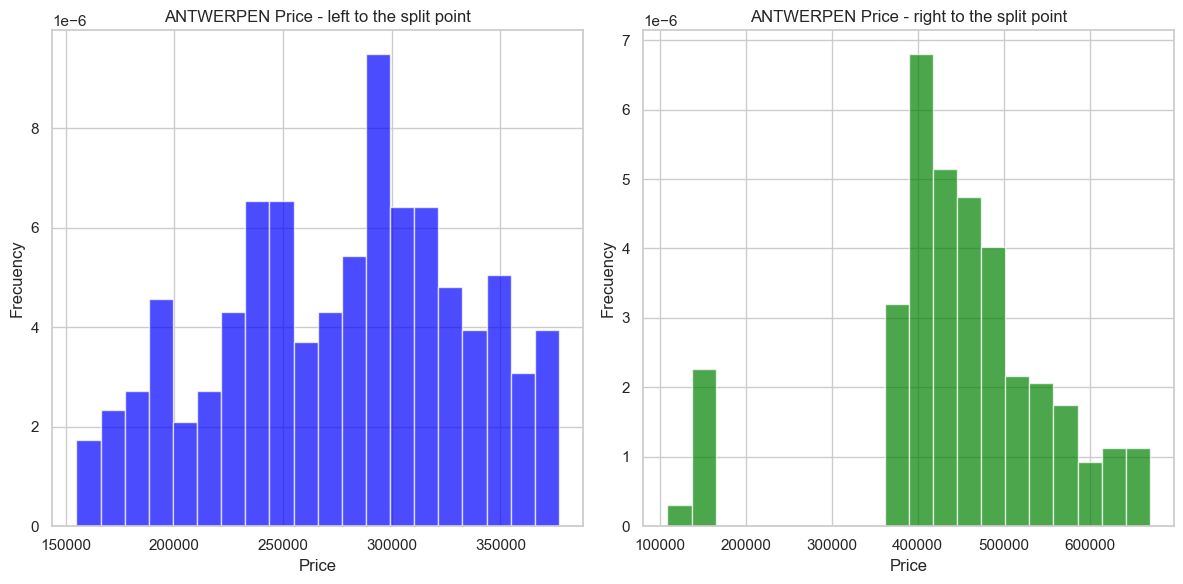

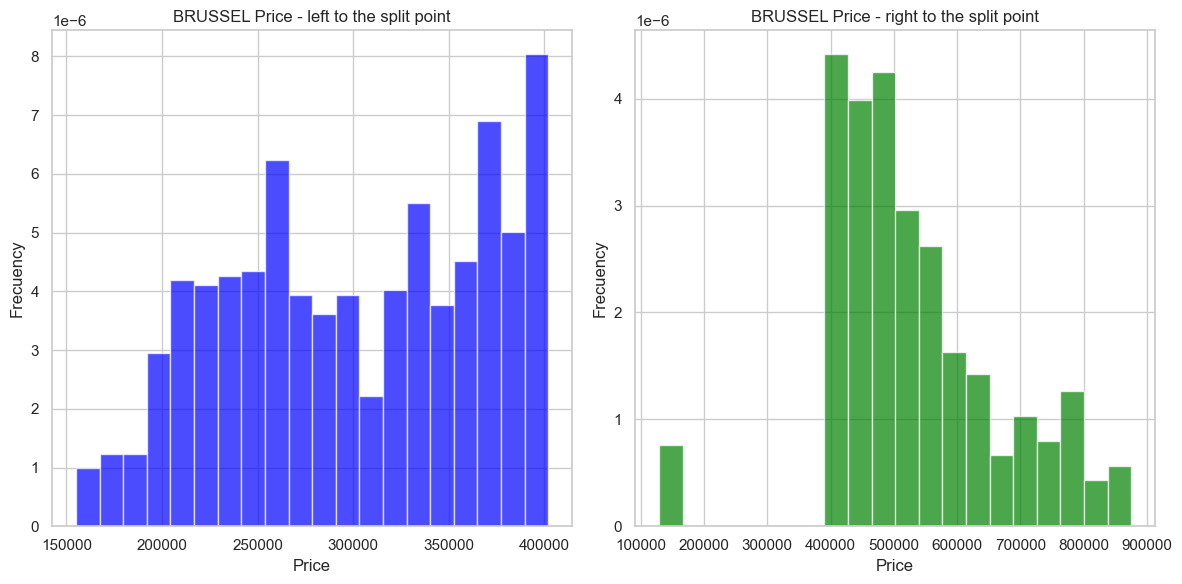

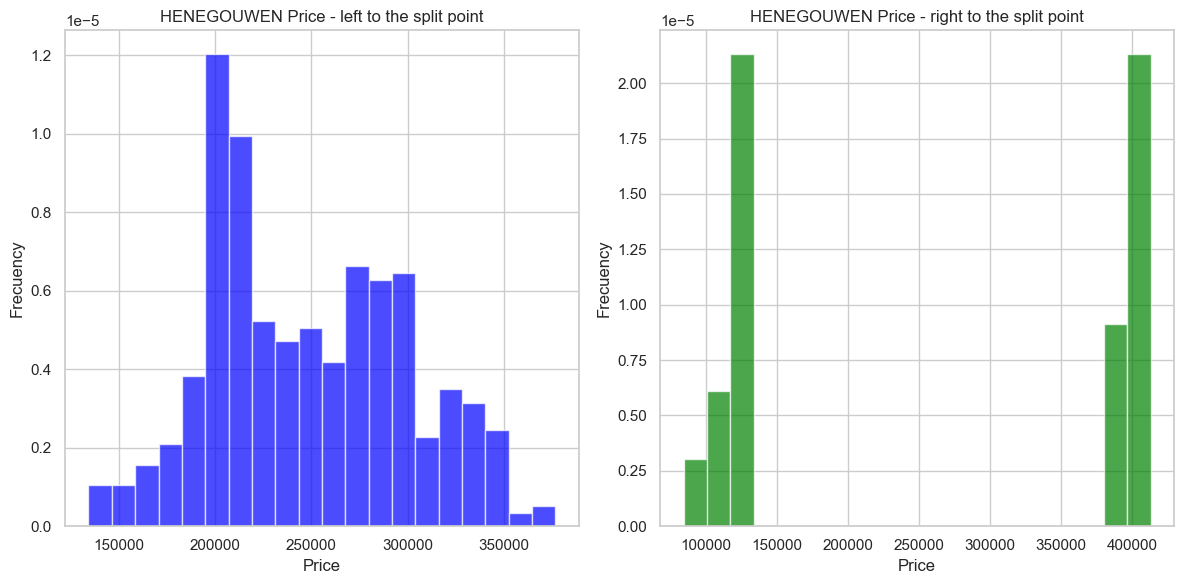

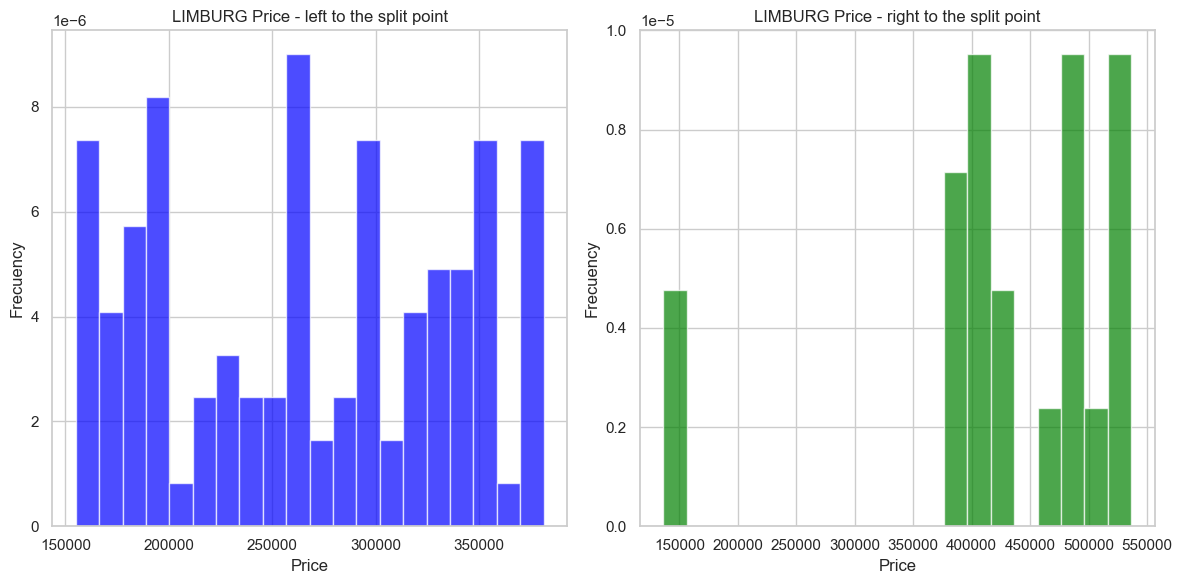

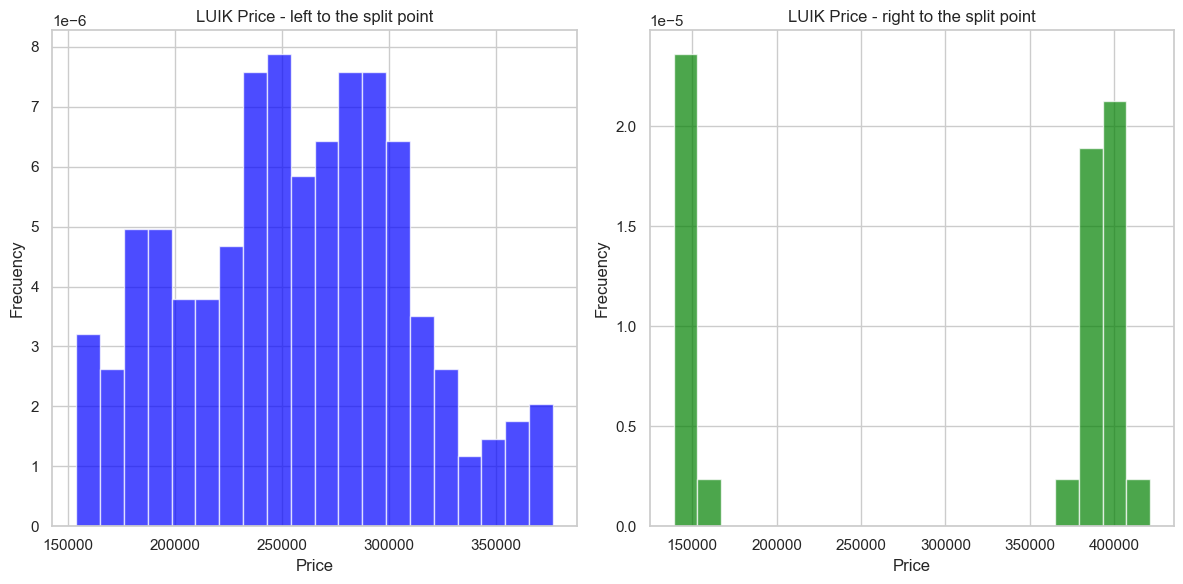

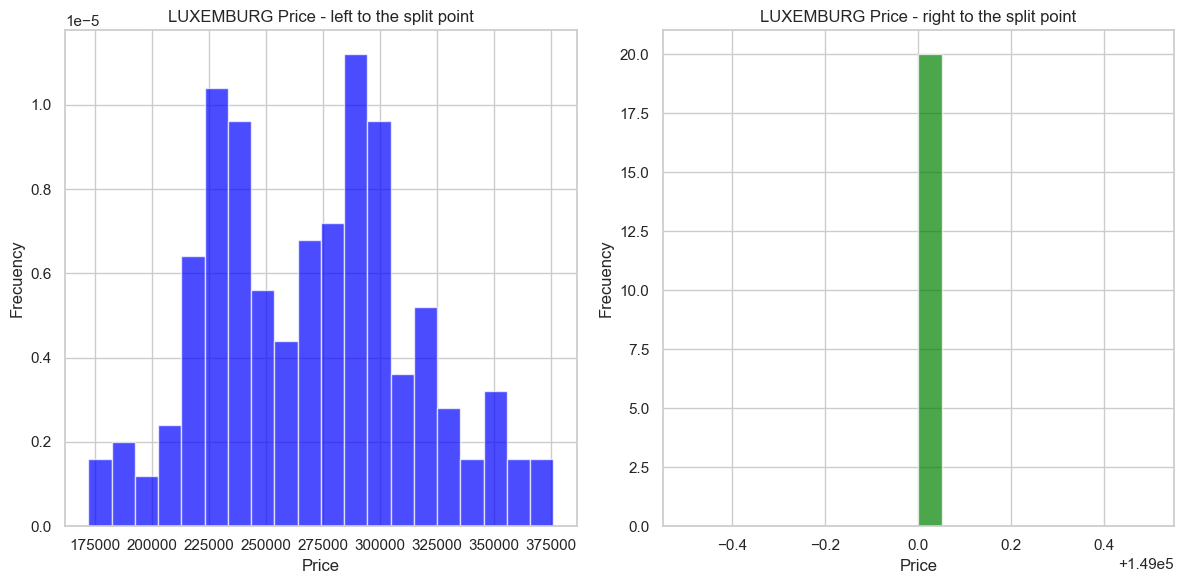

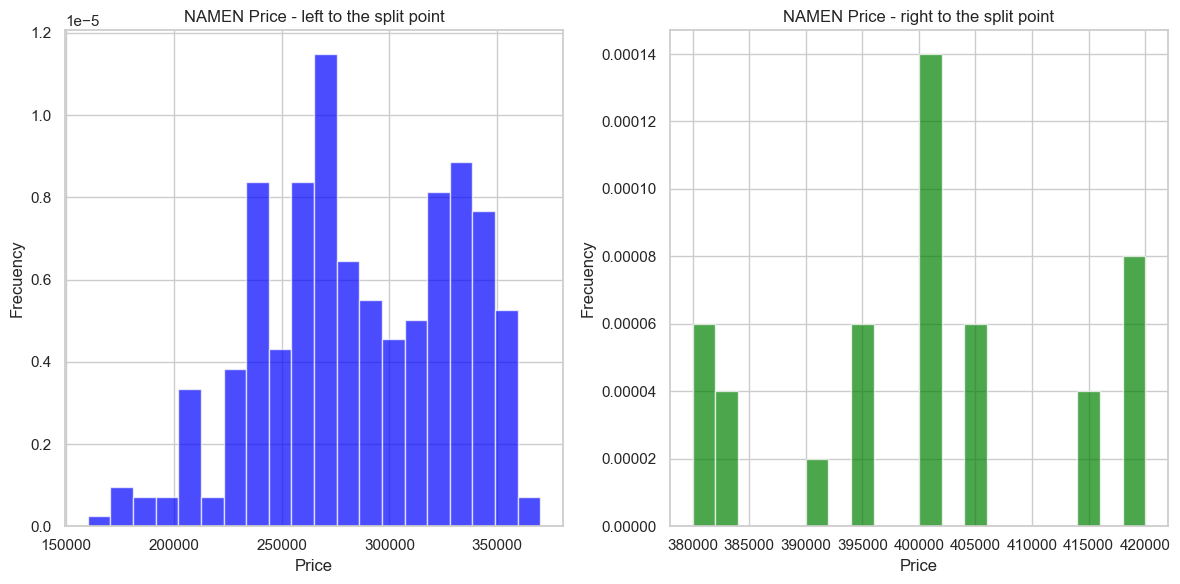

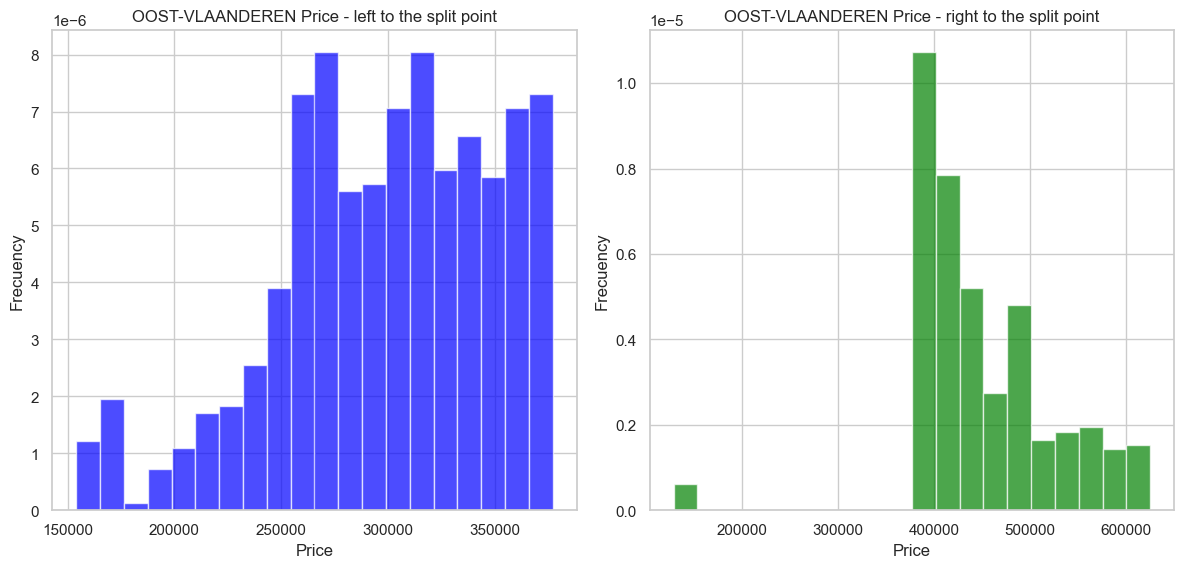

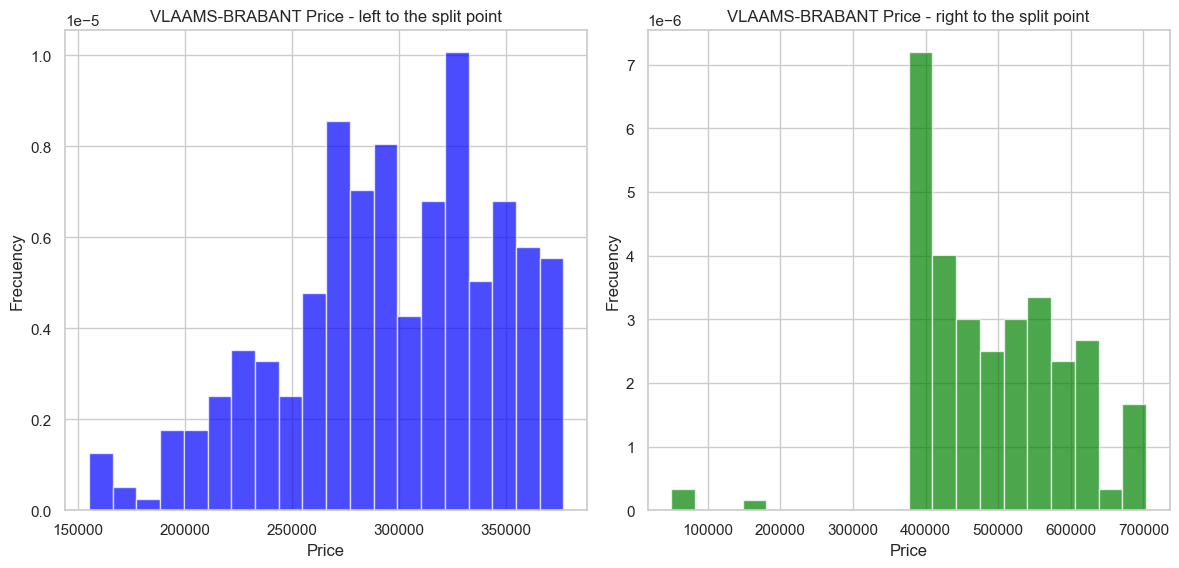

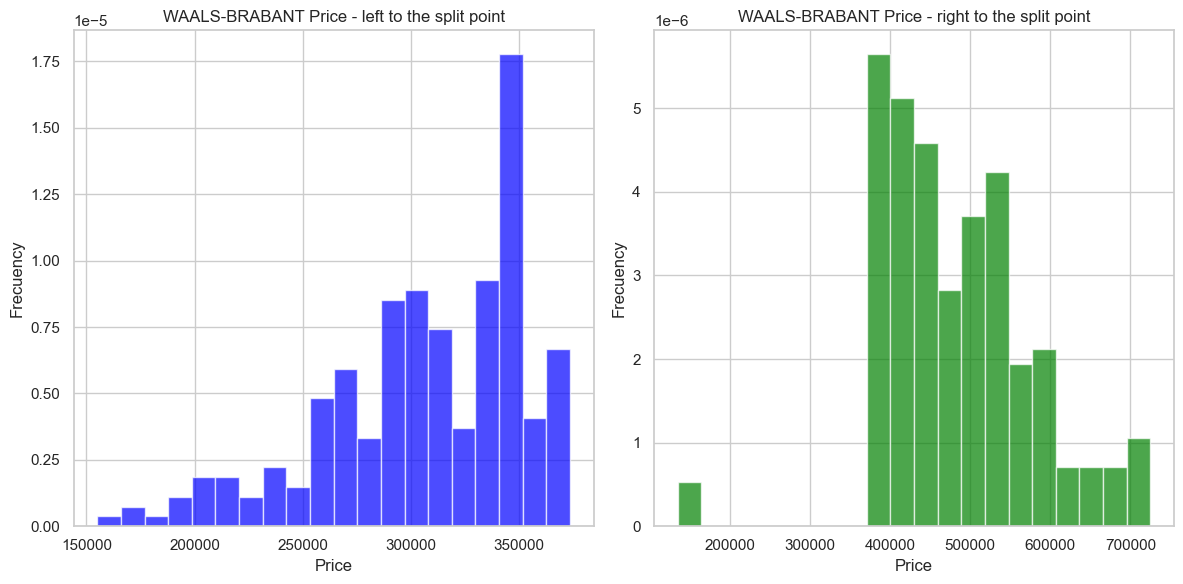

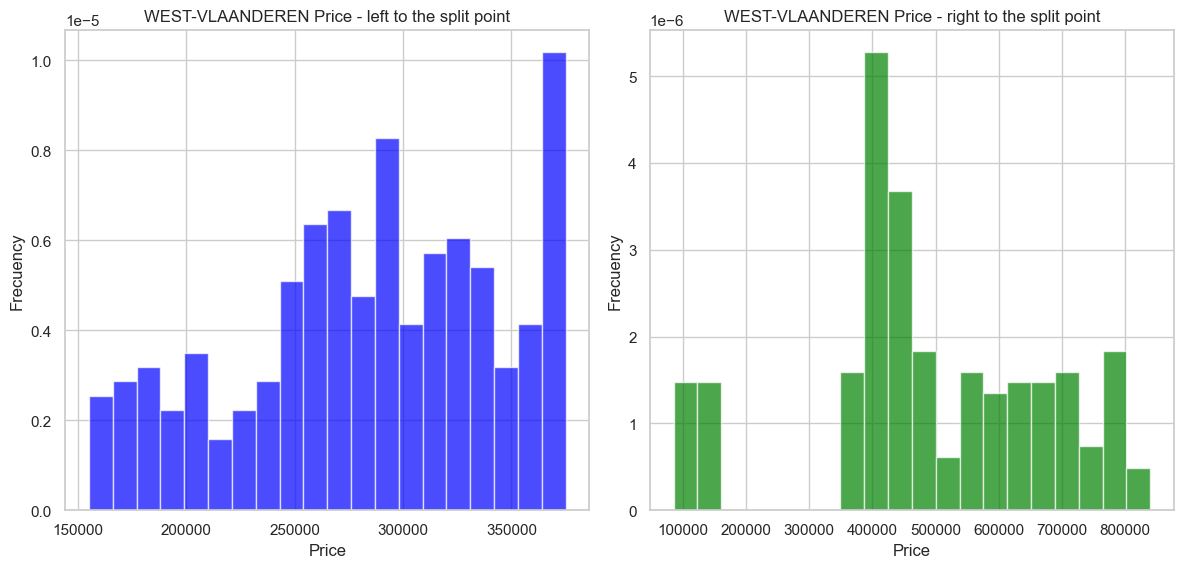

In [9]:
# Plot Range around 50000 - Price

for prov in modes_range_df.Province.unique():

    df_left = modes_range_df[(modes_range_df['Province'] == prov) & (modes_range_df['higher_occurrence'] == 1)]
    df_right = modes_range_df[(modes_range_df['Province'] == prov) & (modes_range_df['lower_occurrence'] == 1)]
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(df_left['Price'], bins=20, color='blue', alpha=0.7, density=True)
    axs[0].set_title(f"{prov} Price - left to the split point")
    axs[0].set_xlabel('Price')
    axs[0].set_ylabel('Frecuency')
    
    
    
    axs[1].hist(df_right['Price'], bins=20, color='green', alpha=0.7, density=True)
    axs[1].set_title(f"{prov} Price - right to the split point")
    axs[1].set_xlabel('Price')
    axs[1].set_ylabel('Frecuency')
    
    plt.tight_layout()
    plt.show()

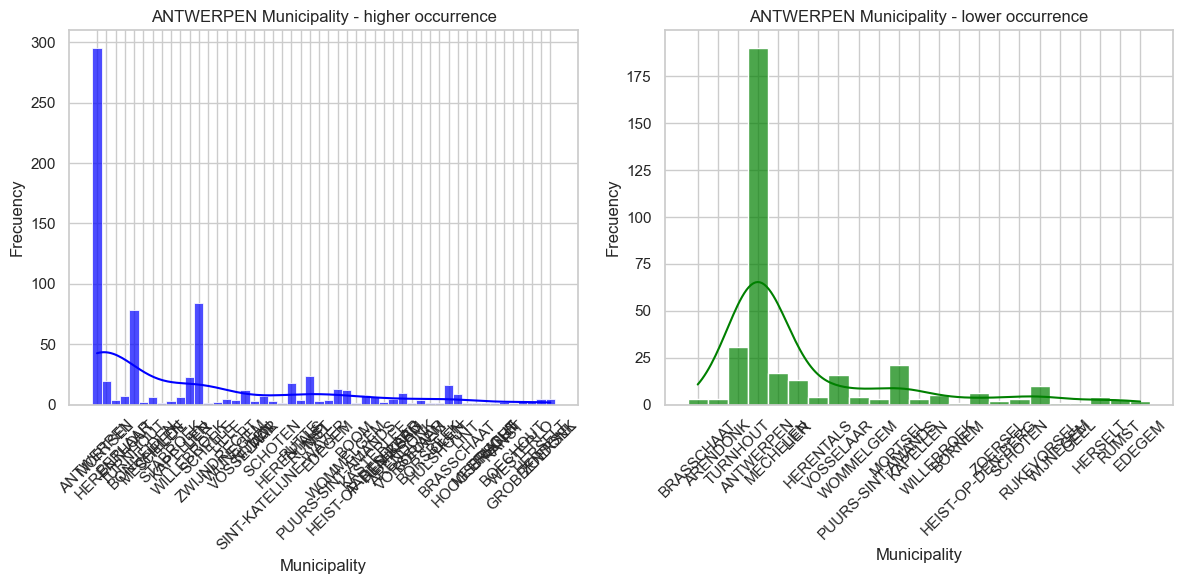

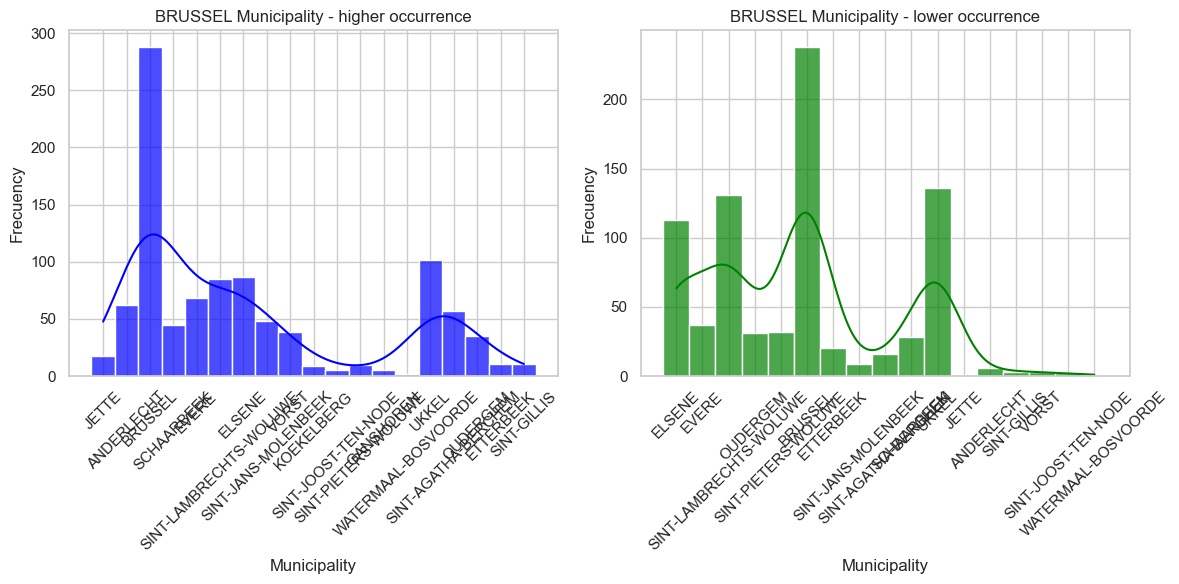

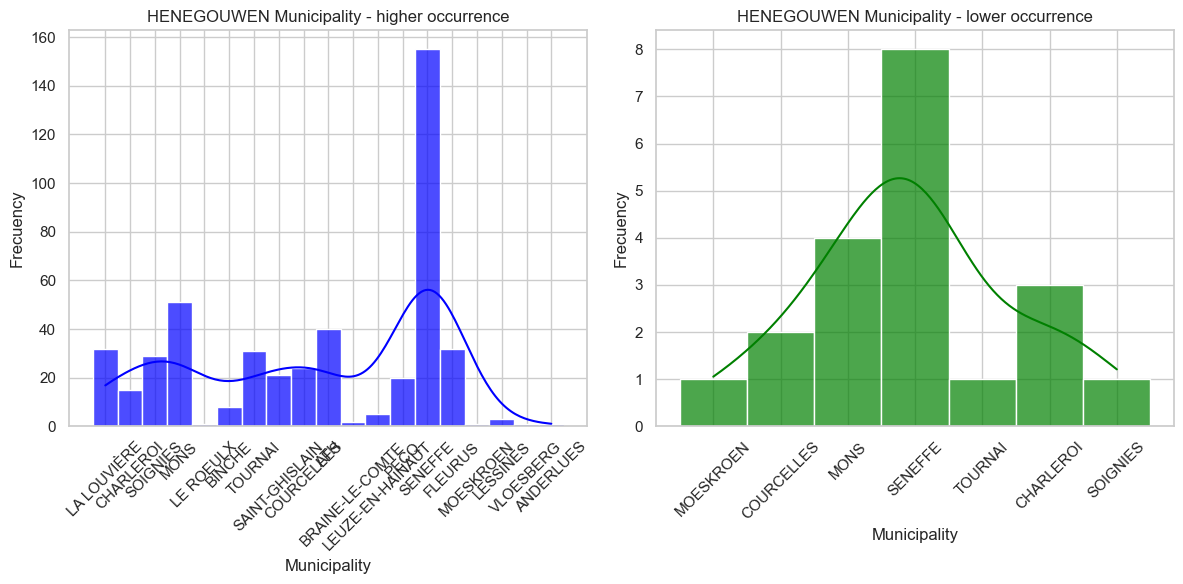

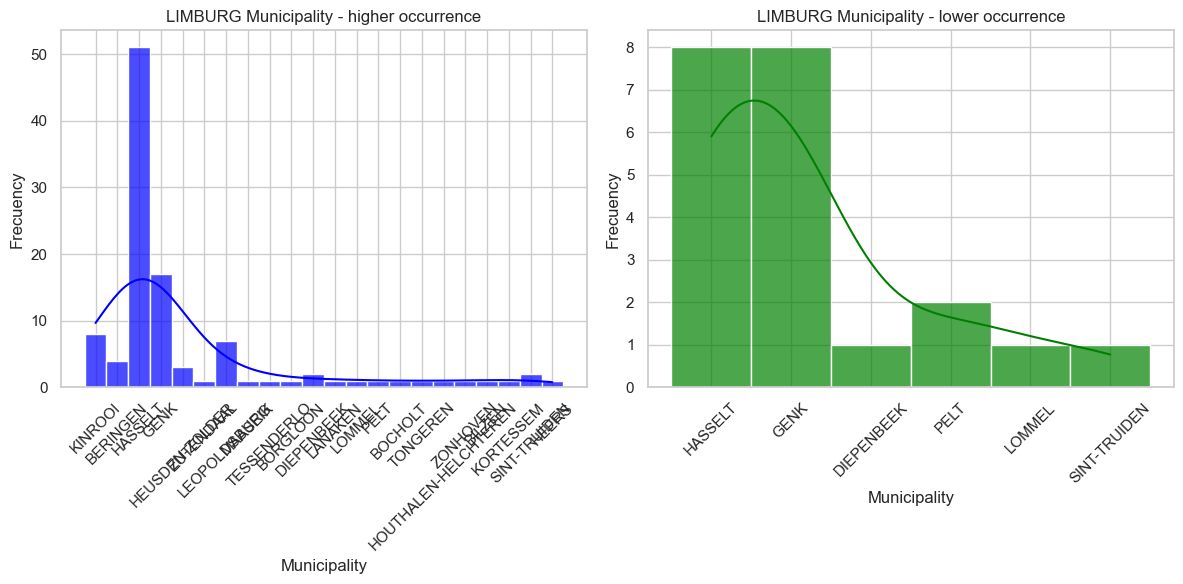

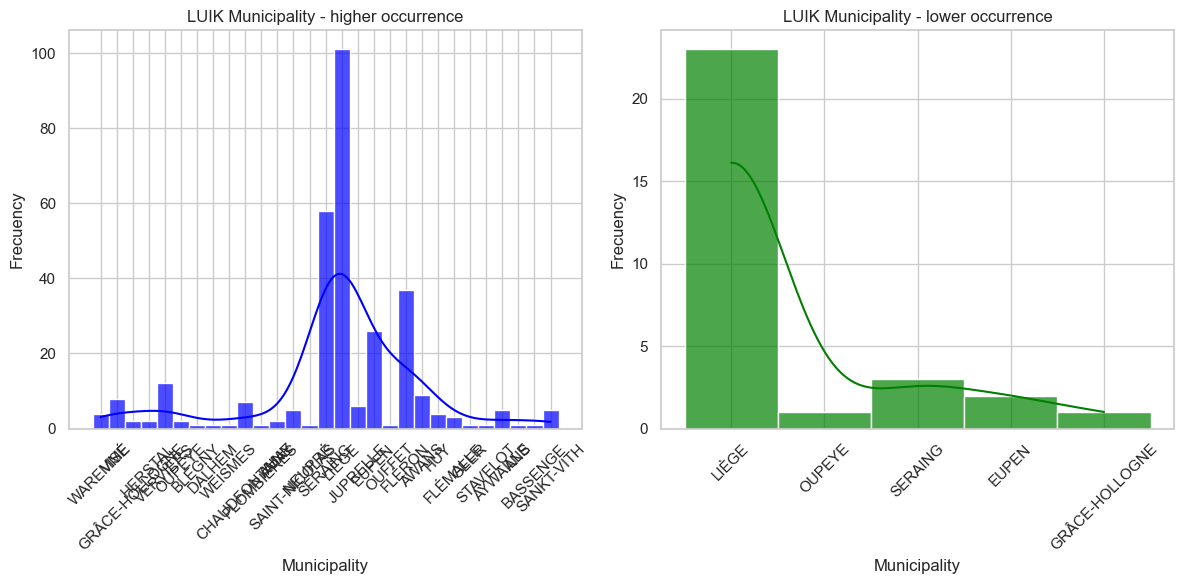

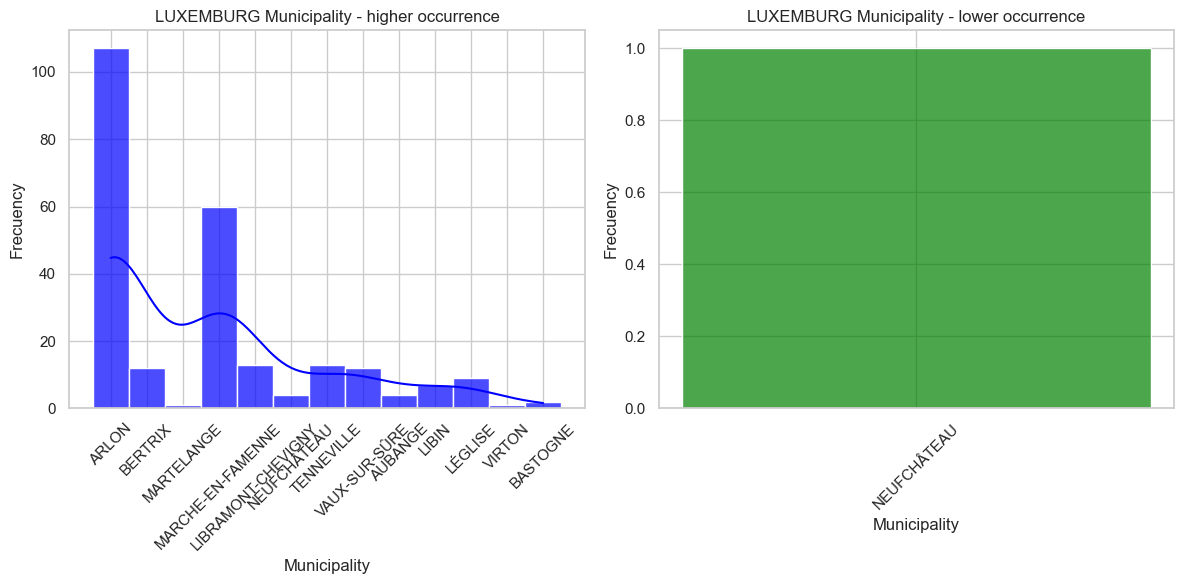

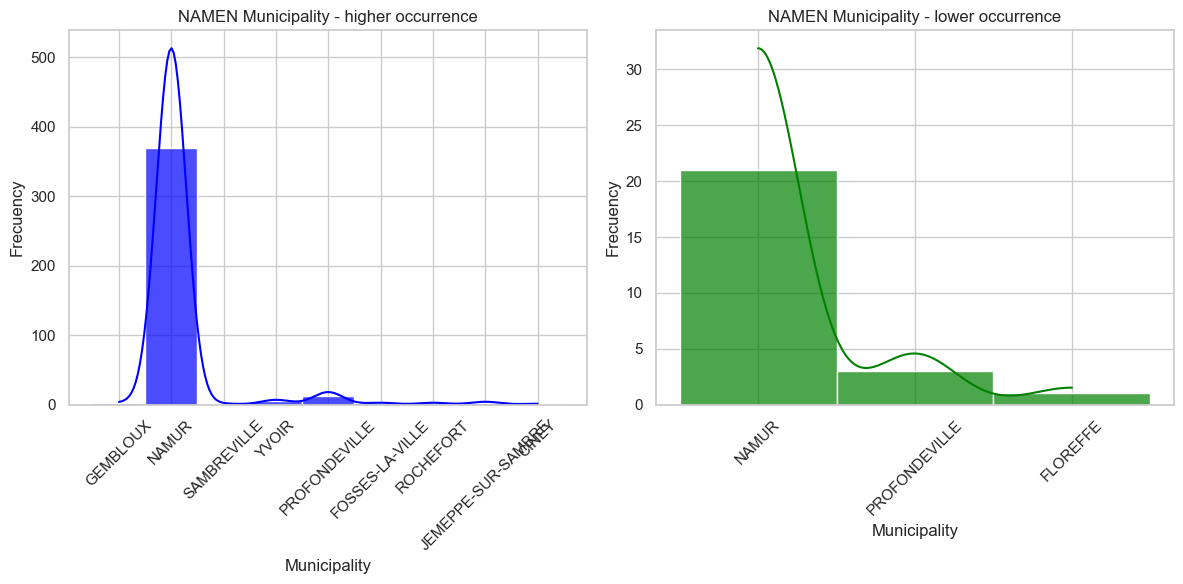

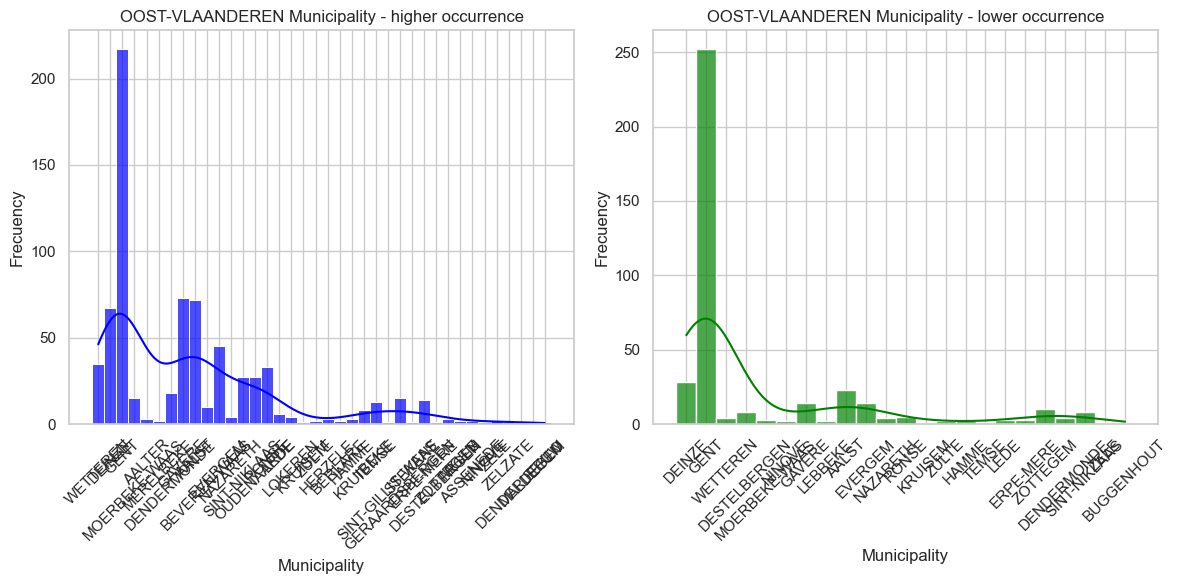

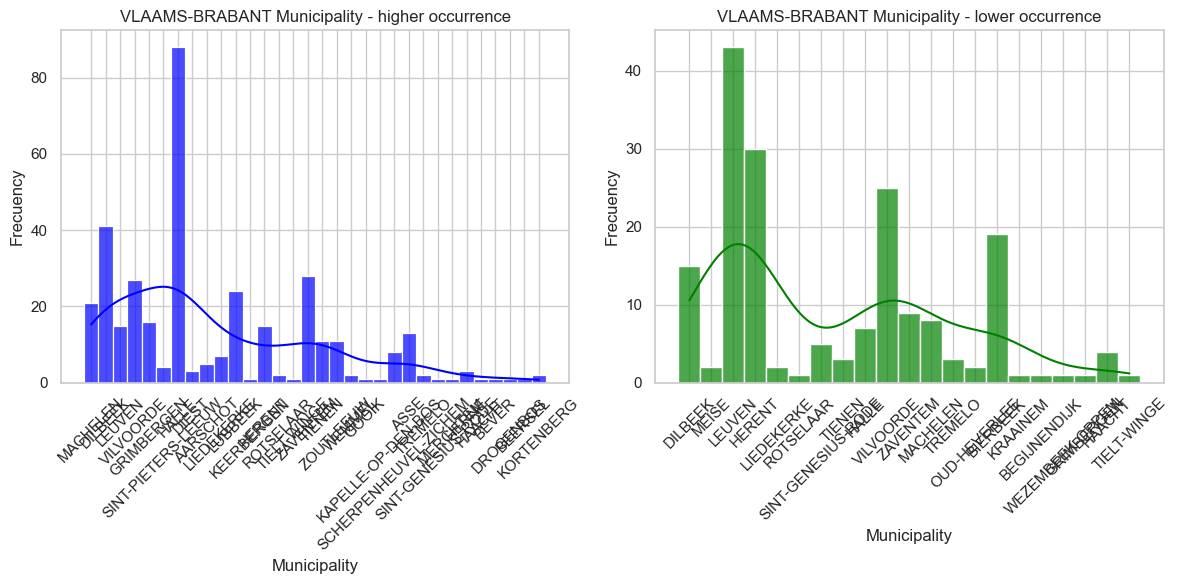

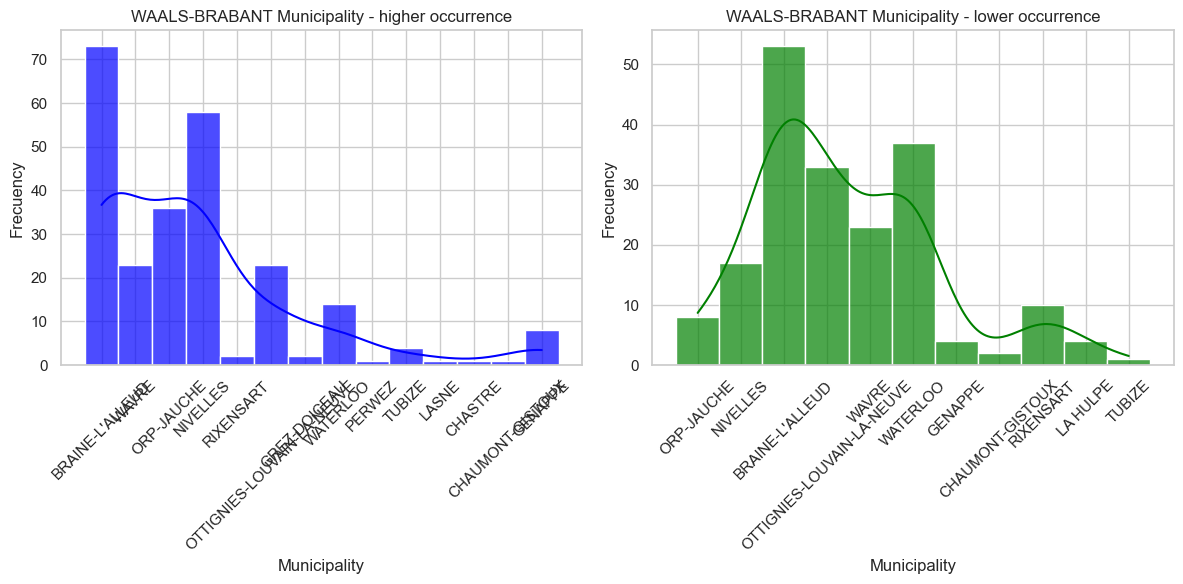

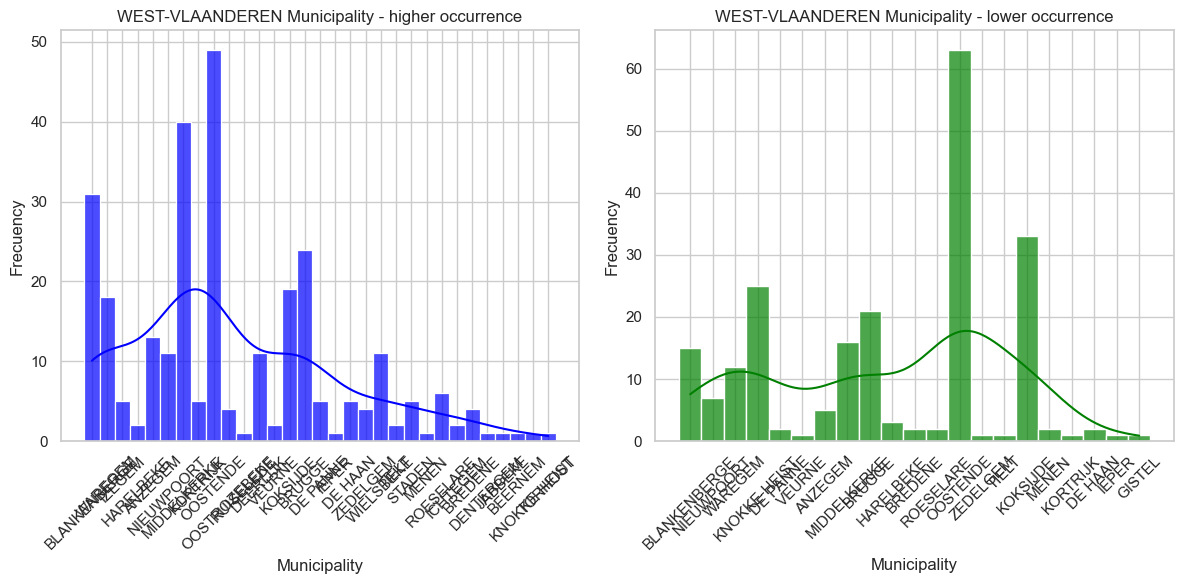

In [10]:
# Plot Range around 50000 - Municipality

for prov in modes_range_df.Province.unique():

    df_high = modes_range_df[(modes_range_df['Province'] == prov) & (modes_range_df['higher_occurrence'] == 1)]
    df_low = modes_range_df[(modes_range_df['Province'] == prov) & (modes_range_df['lower_occurrence'] == 1)]
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.histplot(df_high['Municipality'], bins=20, color='blue', alpha=0.7, kde=True, ax=axs[0])
    axs[0].set_title(f"{prov} Municipality - higher occurrence")
    axs[0].set_xlabel('Municipality')
    axs[0].set_ylabel('Frecuency')
    axs[0].tick_params(axis='x', rotation=45)
    
    sns.histplot(df_low['Municipality'], bins=20, color='green', alpha=0.7, kde=True, ax=axs[1])
    axs[1].set_title(f"{prov} Municipality - lower occurrence")
    axs[1].set_xlabel('Municipality')
    axs[1].set_ylabel('Frecuency')
    axs[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

In [11]:
# Adding two new columns in two_modes_df depending on if Price is greater or not then the split_point for each Province

split_point = {}
two_modes_df = immo_AP_clean.copy()
two_modes_df['left'] = 0
two_modes_df['right'] = 0

for prov, two_modes in modes.items():
    split_point[prov] = (two_modes[1] + two_modes[0]) / 2
    
    two_modes_df.loc[(two_modes_df['Province'] == prov) & (two_modes_df['Price'] < split_point[prov]), 'left'] = 1
    two_modes_df.loc[(two_modes_df['Province'] == prov) & (two_modes_df['Price'] >= split_point[prov]), 'right'] = 1

    
print(split_point)
two_modes_df


{'ANTWERPEN': 249250.0, 'BRUSSEL': 278200.0, 'HENEGOUWEN': 232257.94999999998, 'LIMBURG': 296369.8, 'LUIK': 251905.6, 'LUXEMBURG': 251150.0, 'NAMEN': 290000.0, 'OOST-VLAANDEREN': 302600.0, 'VLAAMS-BRABANT': 278725.0, 'WAALS-BRABANT': 282500.0, 'WEST-VLAANDEREN': 273750.0}


Price  Facades  Habitable Surface       Type  Bedroom Count  \
0     175000      2.0               90.0  APARTMENT            2.0   
1     249000      2.0               83.0  APARTMENT            1.0   
2     265000      3.0               82.0  APARTMENT            1.0   
3     269000      3.0               82.0  APARTMENT            1.0   
4     299000      3.0               94.0  APARTMENT            2.0   
...      ...      ...                ...        ...            ...   
7107  565000      2.0               72.0  APARTMENT            2.0   
7108  239000      2.0               84.0  APARTMENT            2.0   
7109  369000      2.0               80.0  APARTMENT            2.0   
7110  269000      2.0               45.0  APARTMENT            1.0   
7111  475000      4.0              101.0  APARTMENT            3.0   

      Bathroom Count  Toilet Count  Room Count  Kitchen Type  Furnished  ...  \
0                1.0           1.0         4.0           1.0          0  ...   
1                1.0           1.0         3.0           1.0          0  ...   
2                1.0           1.0         3.0           1.0          0  ...   
3                1.0           1.0         3.0           1.0          0  ...   
4                1.0           1.0         4.0           1.0          0  ...   
...              ...           ...         ...           ...        ...  ...   
7107             1.0           1.0         4.0           1.0          0  ...   
7108             1.0           1.0         4.0           1.0          0  ...   
7109             1.0           1.0         4.0           1.0          0  ...   
7110             1.0           1.0         2.0           1.0          0  ...   
7111             1.0           1.0         4.0           1.0          0  ...   

      State of Building  Living Surface  EPC  Consumption Per m2  \
0                   3.0       37.000000  5.0          124.000000   
1                   3.0       41.000000  5.0          188.000000   
2                   3.0       42.000000  5.0          196.697603   
3                   3.0       35.000000  5.0          196.697603   
4                   3.0       29.000000  5.0          196.697603   
...                 ...             ...  ...                 ...   
7107                3.0       34.267442  7.0          100.000000   
7108                3.0       34.267442  5.0          124.000000   
7109                5.0       34.267442  5.0          174.000000   
7110                3.0       34.267442  4.0          259.000000   
7111                3.0       34.267442  5.0          185.293879   

      Municipality         Province APARTMENT HOUSE  left  right  
0        ANTWERPEN        ANTWERPEN         1     0     1      0  
1          MORTSEL        ANTWERPEN         1     0     1      0  
2       HERENTHOUT        ANTWERPEN         1     0     0      1  
3       HERENTHOUT        ANTWERPEN         1     0     0      1  
4       HERENTHOUT        ANTWERPEN         1     0     0      1  
...            ...              ...       ...   ...   ...    ...  
7107  KNOKKE-HEIST  WEST-VLAANDEREN         1     0     0      1  
7108  BLANKENBERGE  WEST-VLAANDEREN         1     0     1      0  
7109      OOSTENDE  WEST-VLAANDEREN         1     0     0      1  
7110      KOKSIJDE  WEST-VLAANDEREN         1     0     1      0  
7111    NIEUWPOORT  WEST-VLAANDEREN         1     0     0      1  

[7112 rows x 22 columns]

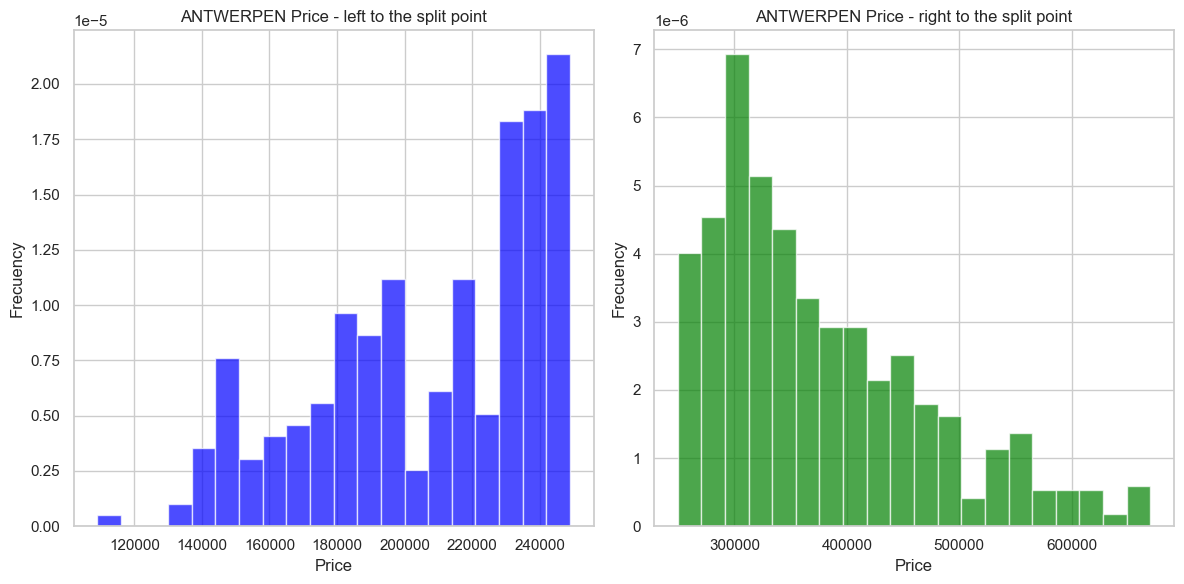

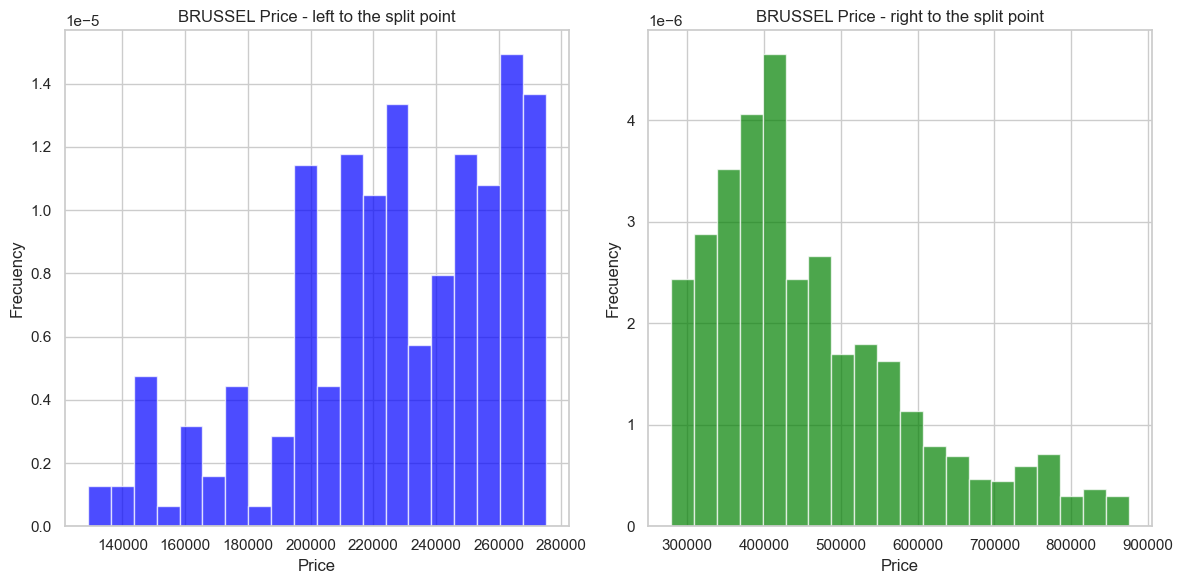

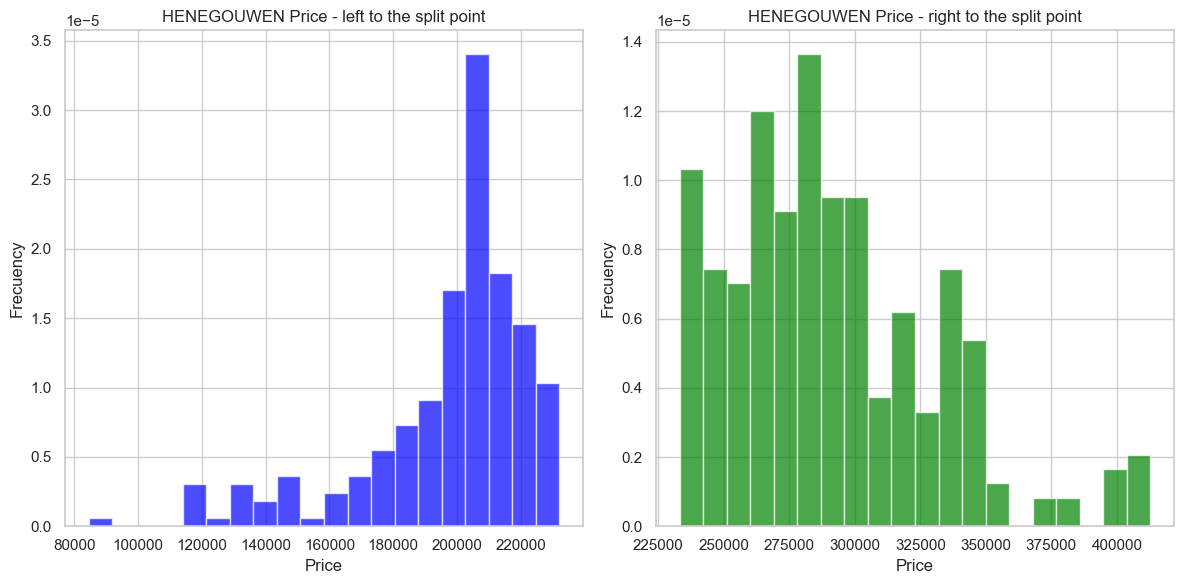

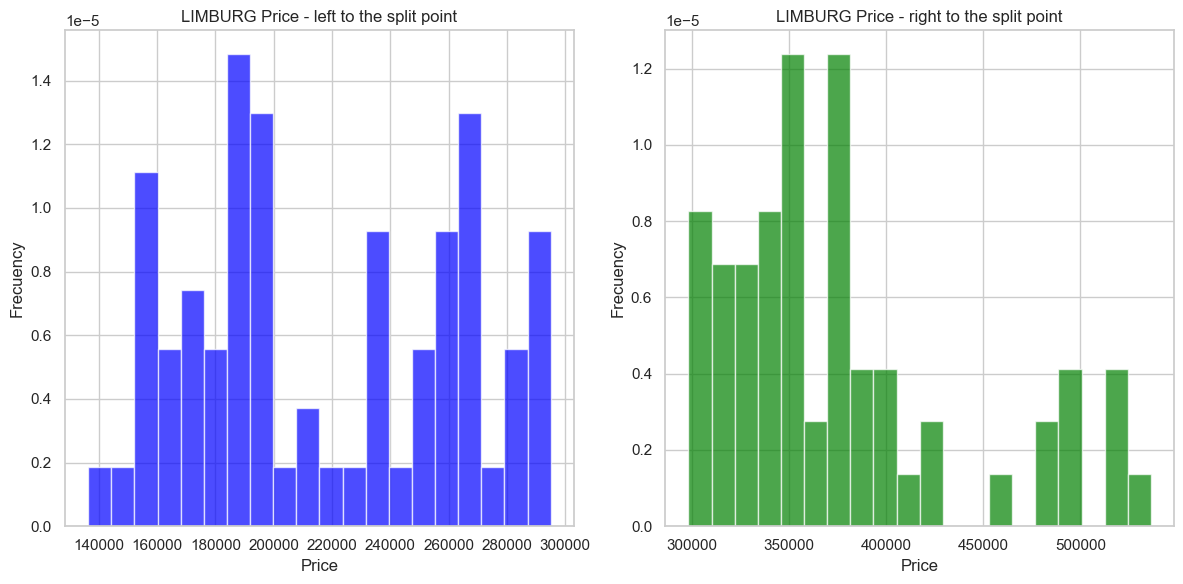

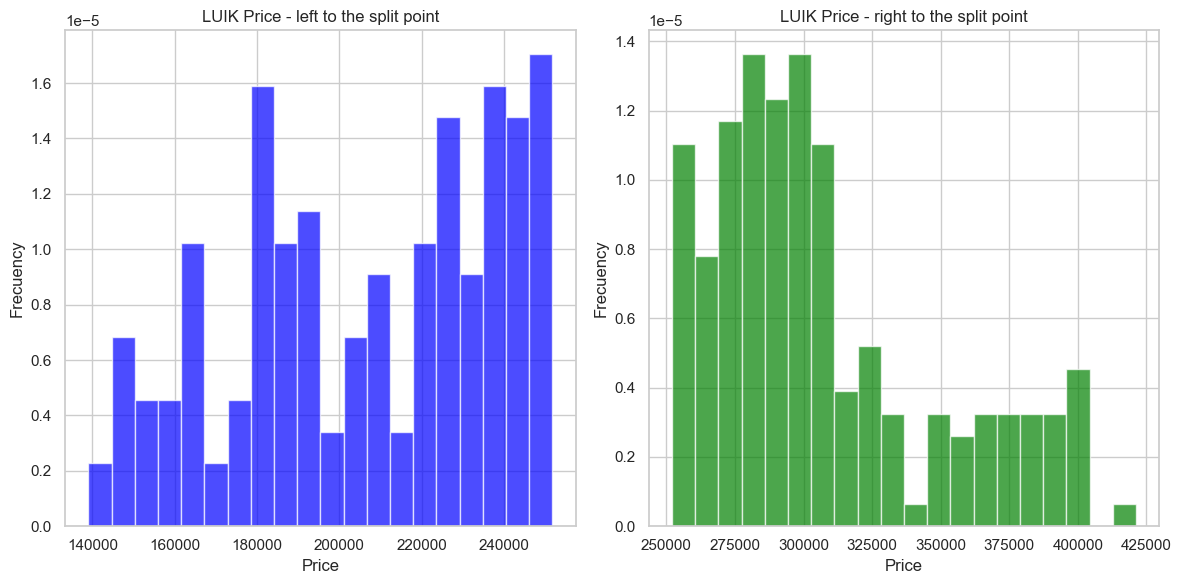

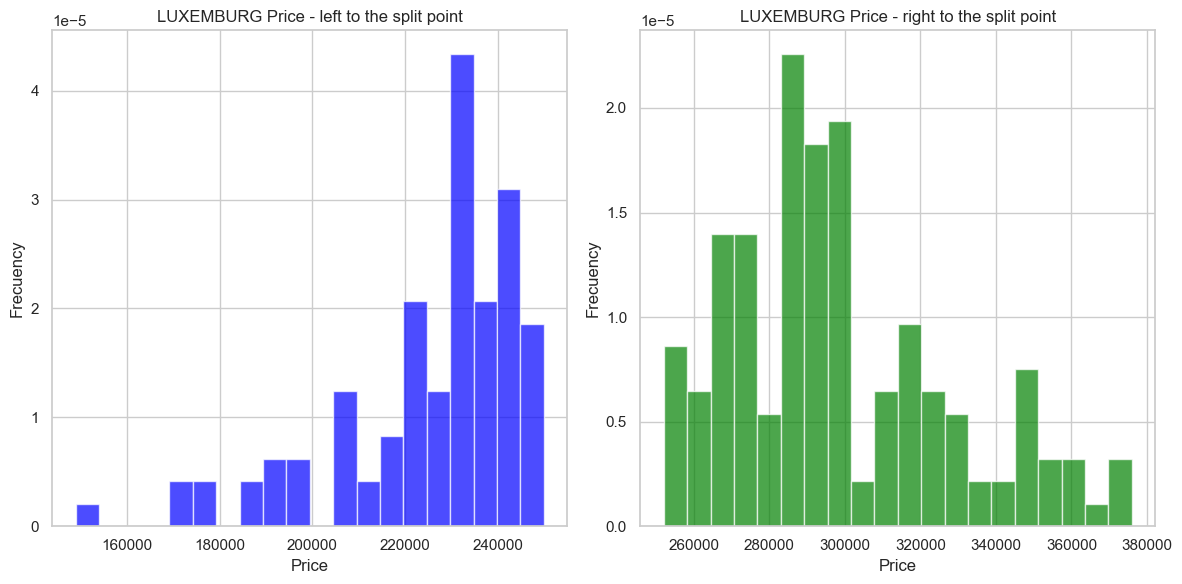

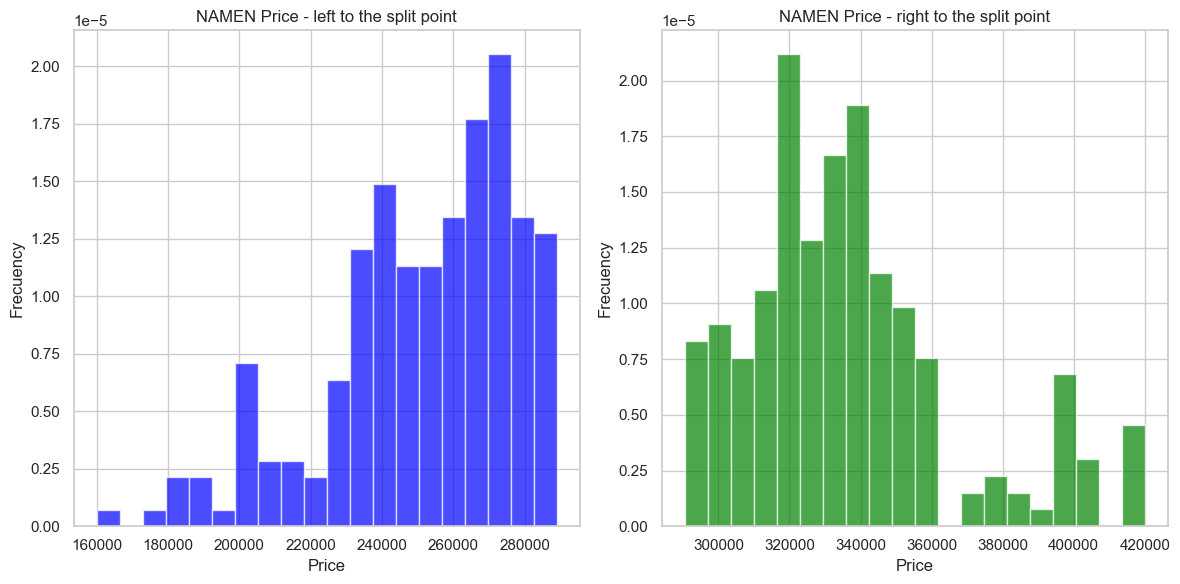

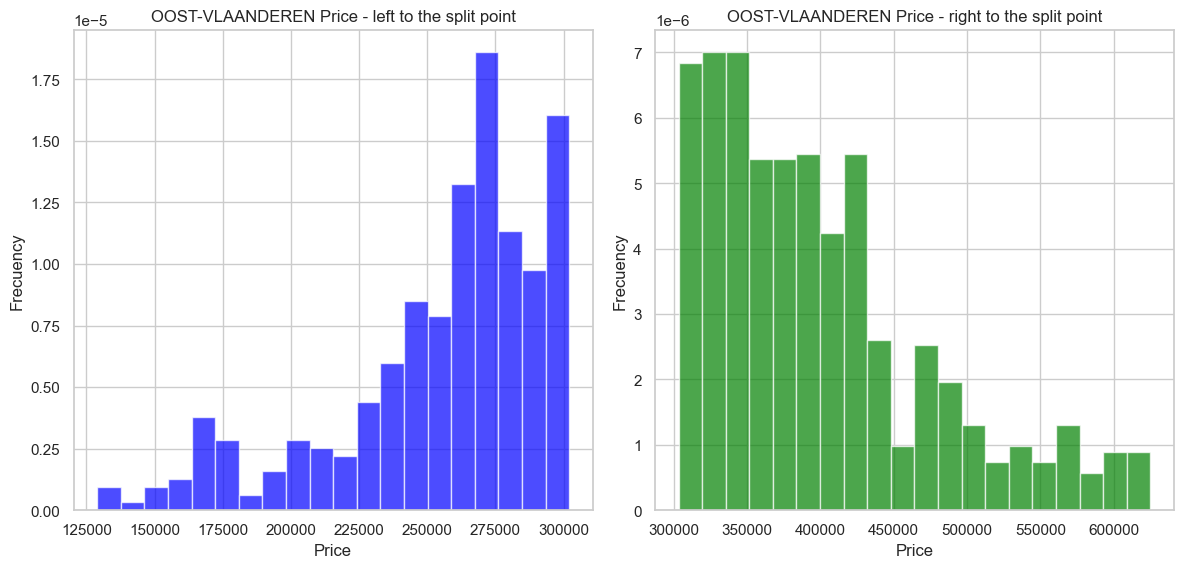

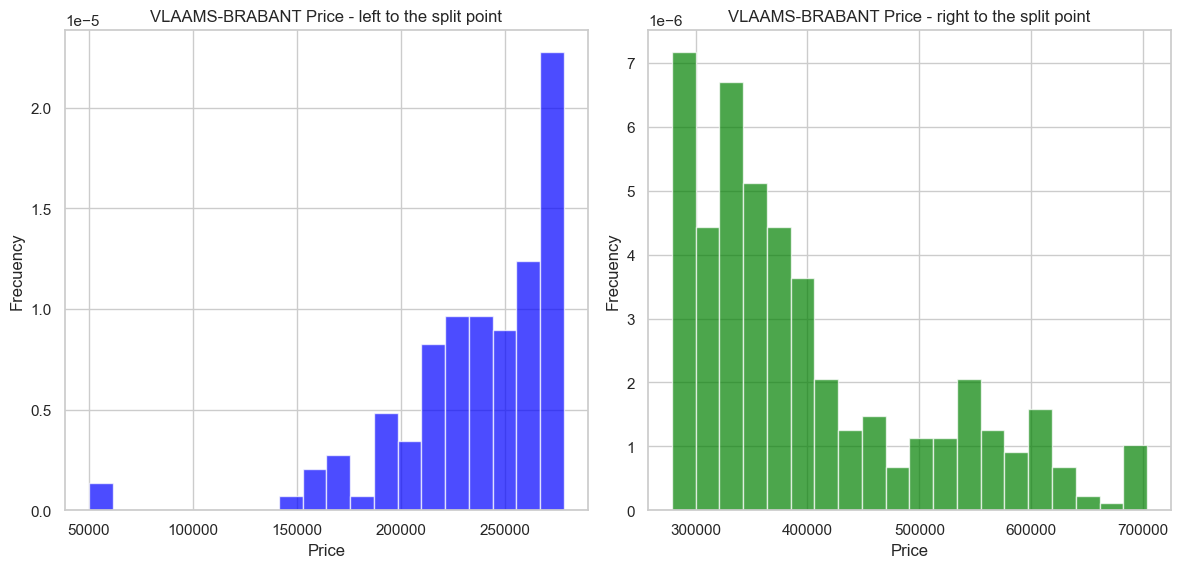

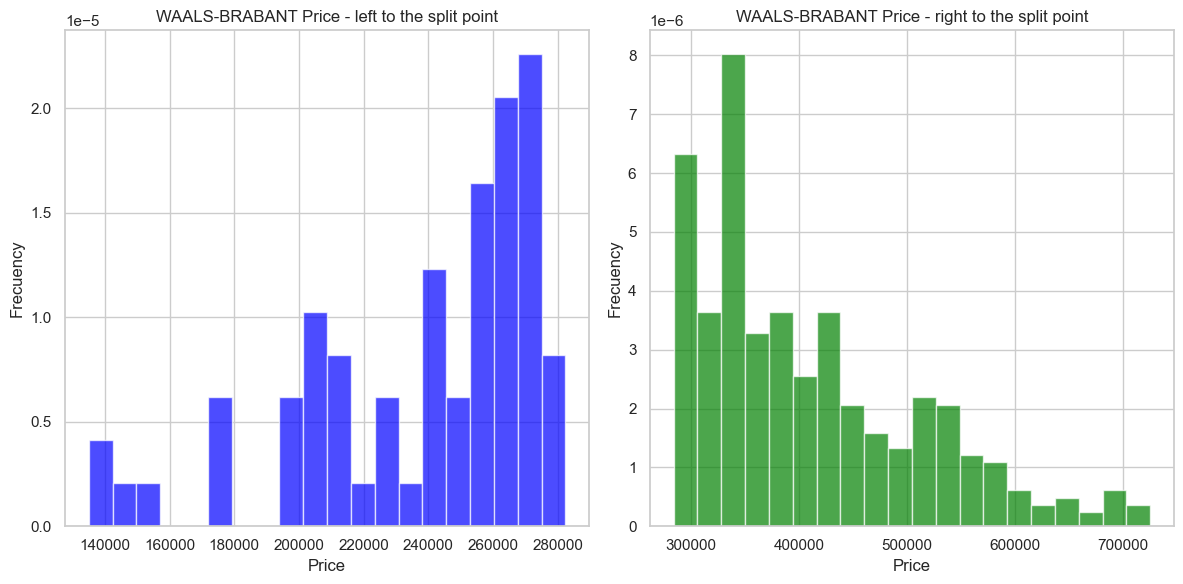

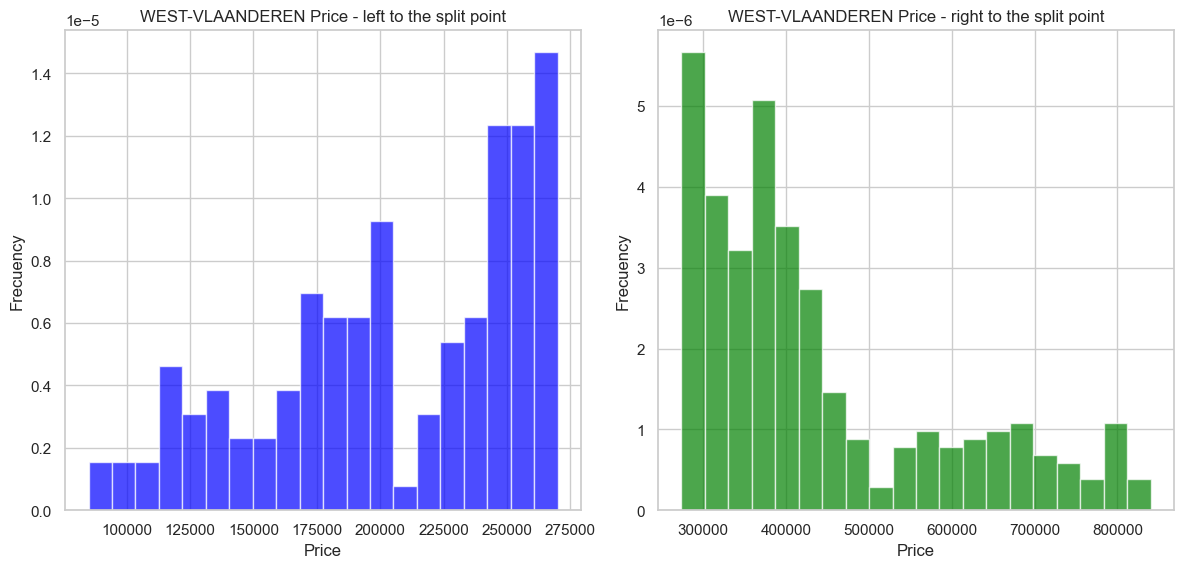

In [12]:
for prov in two_modes_df.Province.unique():

    df_left = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['left'] == 1)]
    df_right = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['right'] == 1)]
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(df_left['Price'], bins=20, color='blue', alpha=0.7, density=True)
    axs[0].set_title(f"{prov} Price - left to the split point")
    axs[0].set_xlabel('Price')
    axs[0].set_ylabel('Frecuency')
    
    
    
    axs[1].hist(df_right['Price'], bins=20, color='green', alpha=0.7, density=True)
    axs[1].set_title(f"{prov} Price - right to the split point")
    axs[1].set_xlabel('Price')
    axs[1].set_ylabel('Frecuency')
    
    plt.tight_layout()
    plt.show()

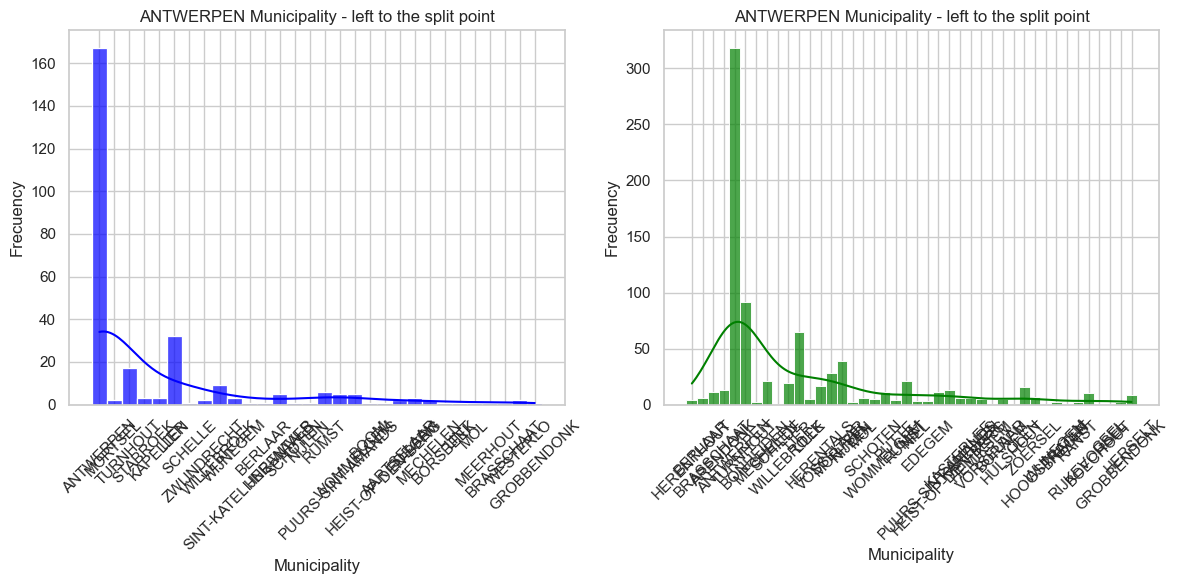

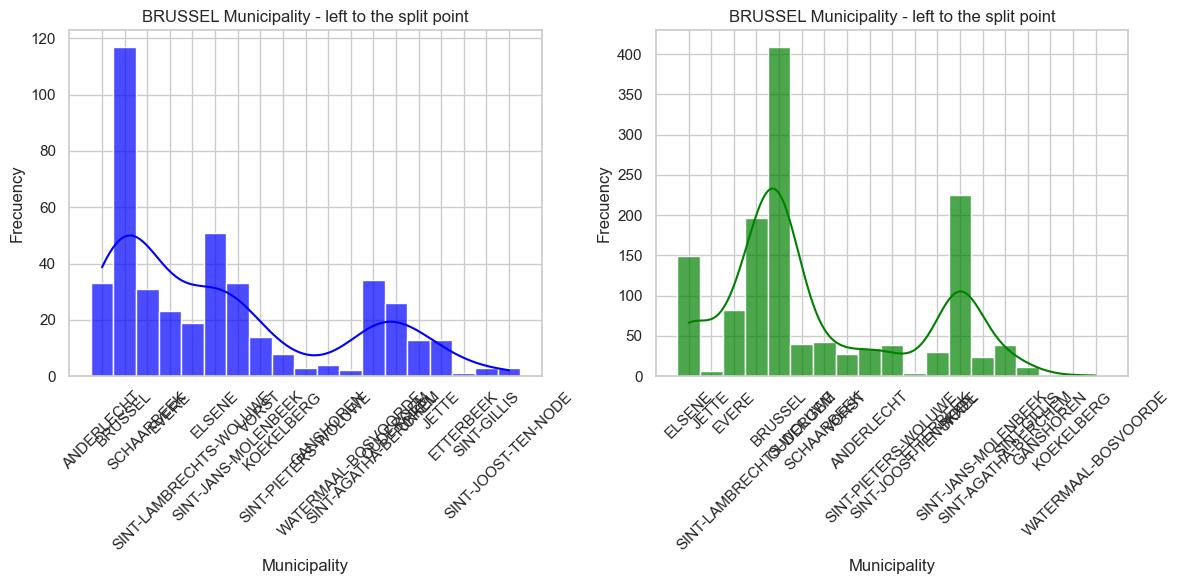

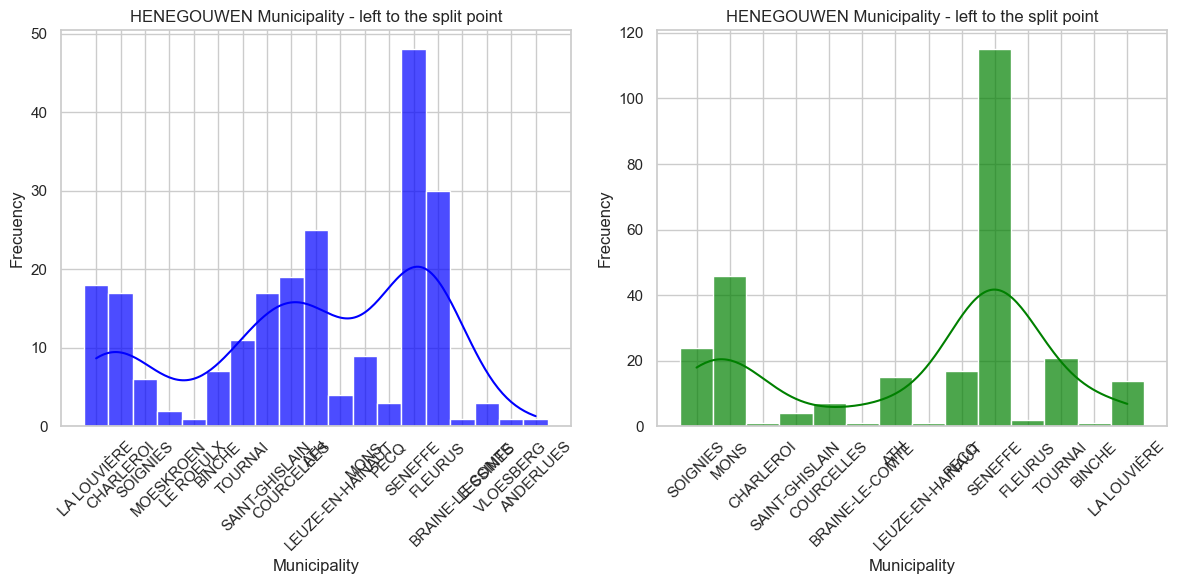

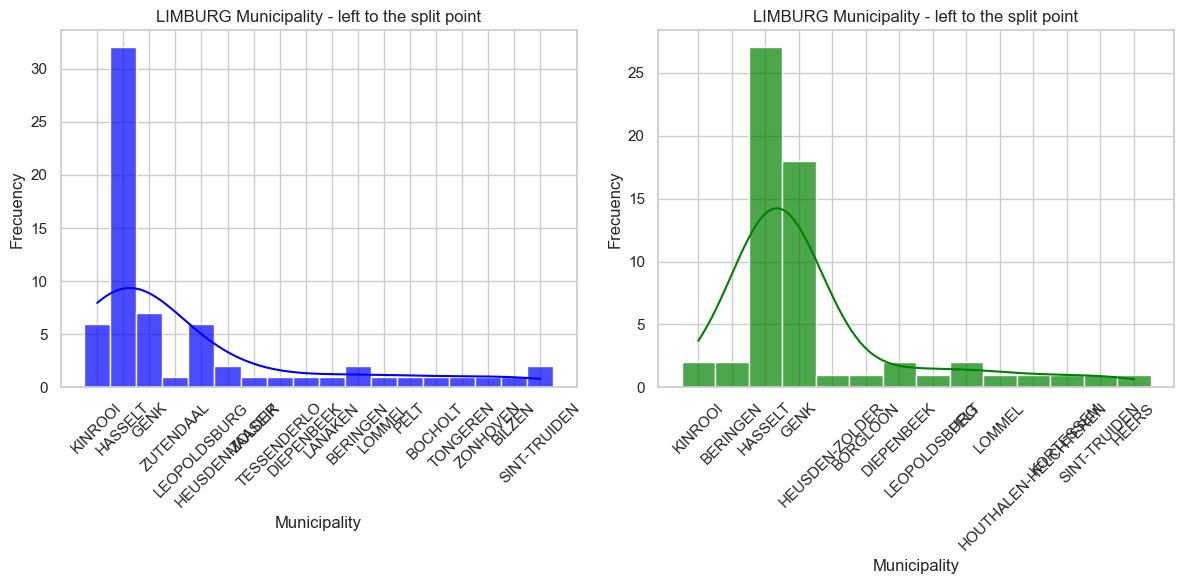

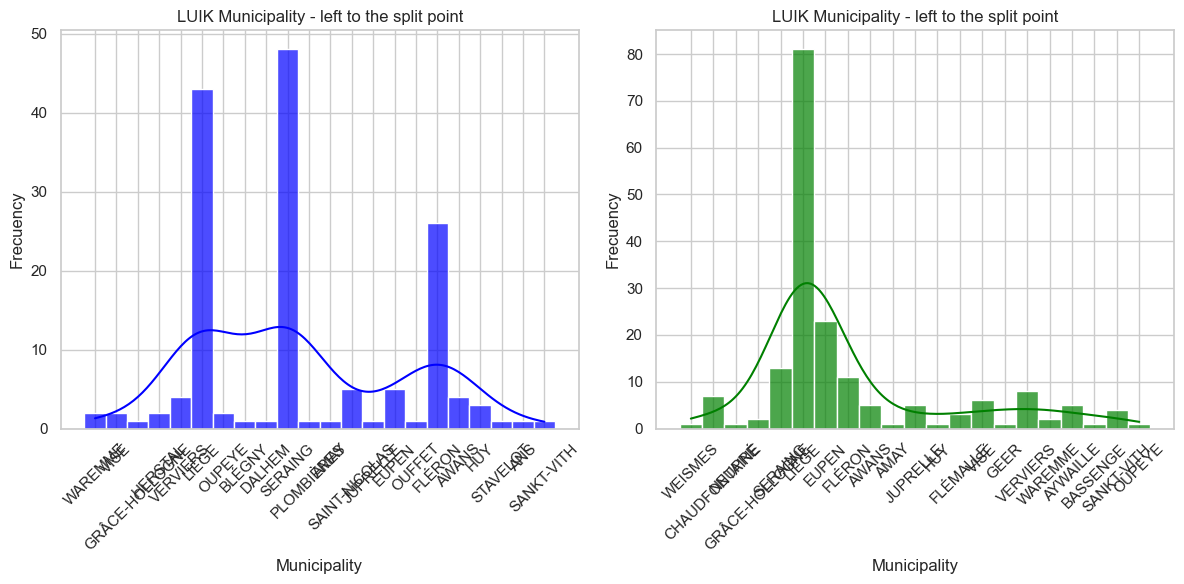

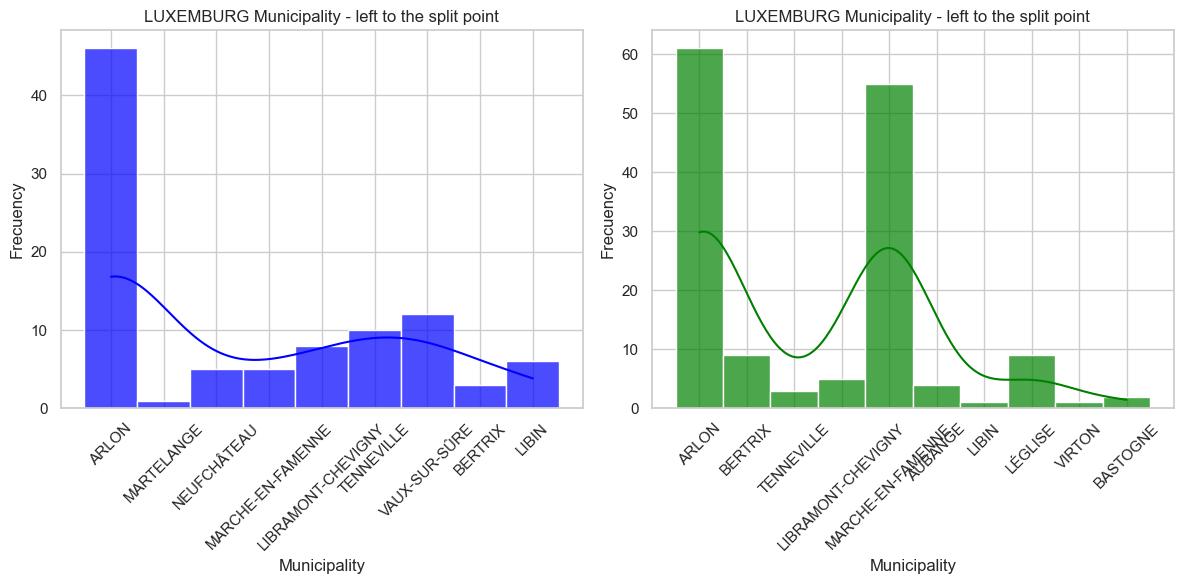

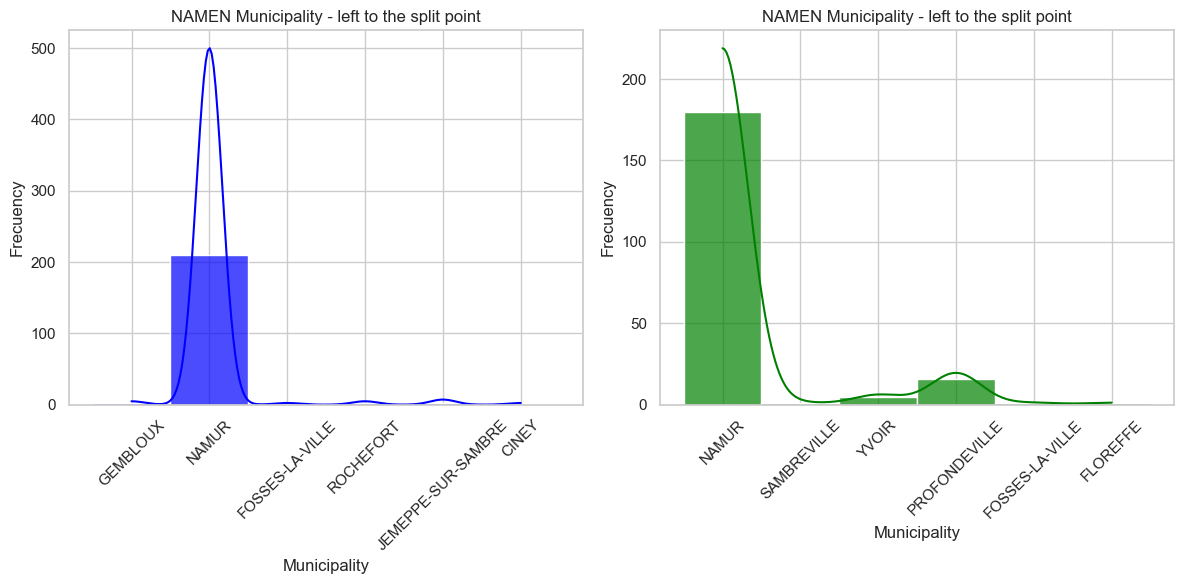

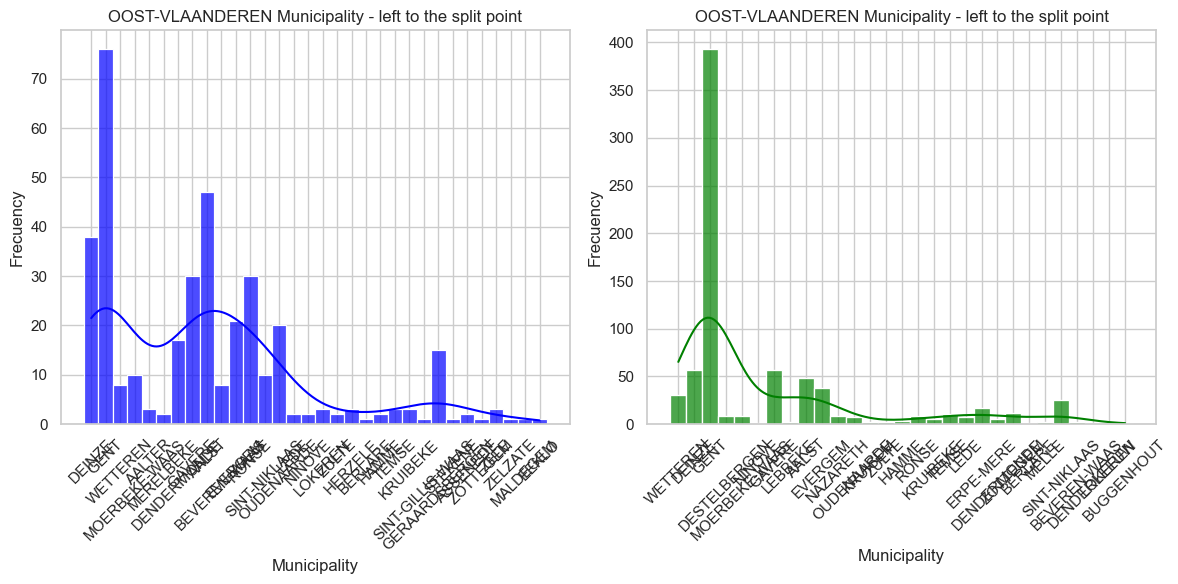

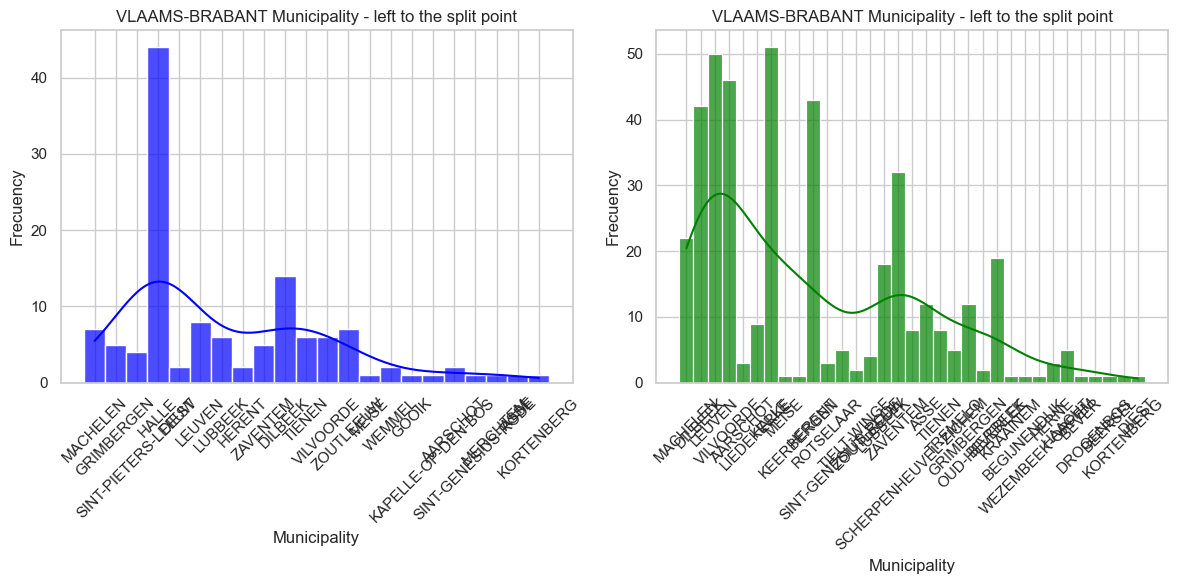

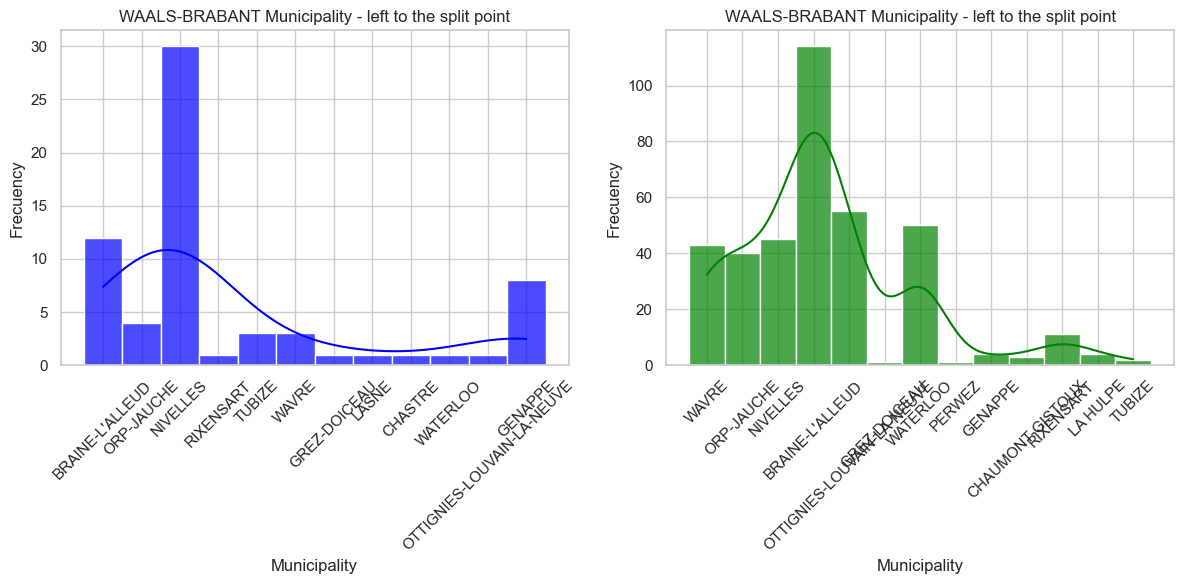

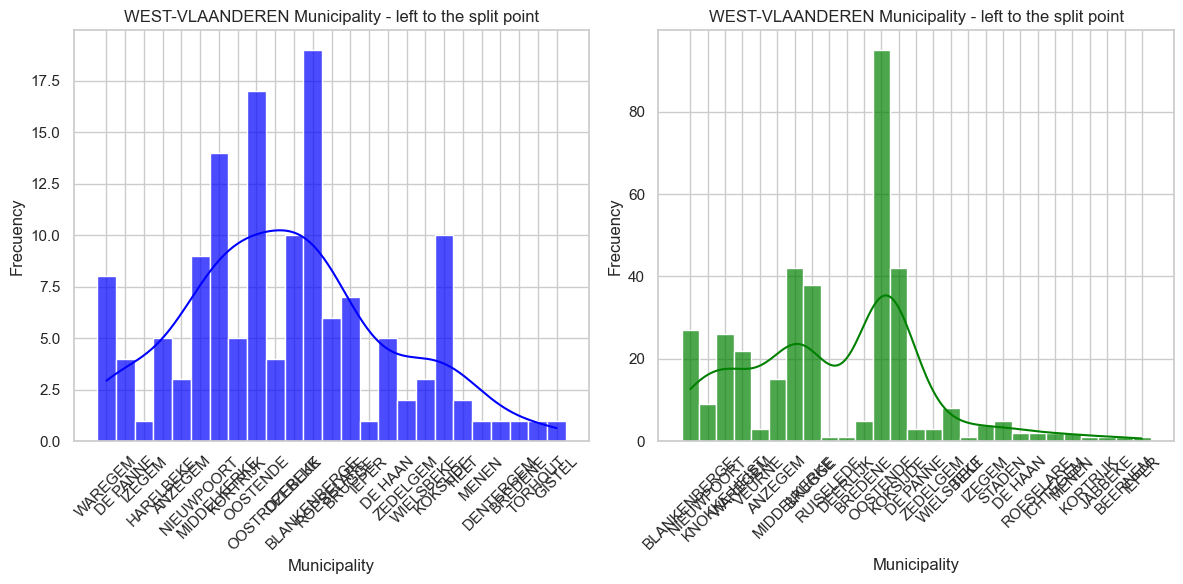

In [13]:
for prov in two_modes_df.Province.unique():

    df_left = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['left'] == 1)]
    df_right = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['right'] == 1)]
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.histplot(df_left['Municipality'], bins=20, color='blue', alpha=0.7, kde=True, ax=axs[0])
    axs[0].set_title(f"{prov} Municipality - left to the split point")
    axs[0].set_xlabel('Municipality')
    axs[0].set_ylabel('Frecuency')
    axs[0].tick_params(axis='x', rotation=45)
    
    sns.histplot(df_right['Municipality'], bins=20, color='green', alpha=0.7, kde=True, ax=axs[1])
    axs[1].set_title(f"{prov} Municipality - left to the split point")
    axs[1].set_xlabel('Municipality')
    axs[1].set_ylabel('Frecuency')
    axs[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


In [14]:
around_mode_ranges

{'ANTWERPEN': {'r1_left': 227300.0,
  'r1_right': 327300.0,
  'r2_left': 171200.0,
  'r2_right': 271200.0},
 'BRUSSEL': {'r1_left': 302800.0,
  'r1_right': 402800.0,
  'r2_left': 153600.0,
  'r2_right': 253600.0},
 'HENEGOUWEN': {'r1_left': 133005.3,
  'r1_right': 233005.3,
  'r2_left': 231510.59999999998,
  'r2_right': 331510.6},
 'LIMBURG': {'r1_left': 286364.0,
  'r1_right': 386364.0,
  'r2_left': 206375.59999999998,
  'r2_right': 306375.6},
 'LUIK': {'r1_left': 173679.2,
  'r1_right': 273679.2,
  'r2_left': 230132.0,
  'r2_right': 330132.0},
 'LUXEMBURG': {'r1_left': 167100.0,
  'r1_right': 267100.0,
  'r2_left': 235200.0,
  'r2_right': 335200.0},
 'NAMEN': {'r1_left': 266000.0,
  'r1_right': 366000.0,
  'r2_left': 214000.0,
  'r2_right': 314000.0},
 'OOST-VLAANDEREN': {'r1_left': 227800.0,
  'r1_right': 327800.0,
  'r2_left': 277400.0,
  'r2_right': 377400.0},
 'VLAAMS-BRABANT': {'r1_left': 261400.0,
  'r1_right': 361400.0,
  'r2_left': 196050.0,
  'r2_right': 296050.0},
 'WAALS-B

In [15]:
modes_range_df.columns

Index(['Price', 'Facades', 'Habitable Surface', 'Type', 'Bedroom Count',
       'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type',
       'Furnished', 'Terrace', 'Terrace Surface', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'Municipality',
       'Province', 'APARTMENT', 'HOUSE', 'higher_occurrence',
       'lower_occurrence'],
      dtype='object')

In [16]:
apartment_high_range = modes_range_df[(modes_range_df['Province'] == 'ANTWERPEN') & (modes_range_df['higher_occurrence'] == 1)]
apartment_high_range

Price  Facades  Habitable Surface       Type  Bedroom Count  \
0     175000      2.0               90.0  APARTMENT            2.0   
1     249000      2.0               83.0  APARTMENT            1.0   
2     265000      3.0               82.0  APARTMENT            1.0   
3     269000      3.0               82.0  APARTMENT            1.0   
4     299000      3.0               94.0  APARTMENT            2.0   
...      ...      ...                ...        ...            ...   
1071  229000      2.0               84.0  APARTMENT            2.0   
1072  349000      2.0               94.0  APARTMENT            2.0   
1074  299000      2.0               93.0  APARTMENT            2.0   
1075  299000      2.0               93.0  APARTMENT            2.0   
1076  175000      2.0               65.0  APARTMENT            1.0   

      Bathroom Count  Toilet Count  Room Count  Kitchen Type  Furnished  ...  \
0                1.0           1.0         4.0           1.0          0  ...   
1                1.0           1.0         3.0           1.0          0  ...   
2                1.0           1.0         3.0           1.0          0  ...   
3                1.0           1.0         3.0           1.0          0  ...   
4                1.0           1.0         4.0           1.0          0  ...   
...              ...           ...         ...           ...        ...  ...   
1071             1.0           1.0         4.0           1.0          0  ...   
1072             1.0           1.0         3.0           1.0          0  ...   
1074             1.0           1.0         4.0           1.0          0  ...   
1075             1.0           1.0         4.0           1.0          0  ...   
1076             1.0           1.0         3.0           2.0          0  ...   

      State of Building  Living Surface  EPC  Consumption Per m2  \
0                   3.0        37.00000  5.0          124.000000   
1                   3.0        41.00000  5.0          188.000000   
2                   3.0        42.00000  5.0          196.697603   
3                   3.0        35.00000  5.0          196.697603   
4                   3.0        29.00000  5.0          196.697603   
...                 ...             ...  ...                 ...   
1071                3.0        28.00000  5.0          117.000000   
1072                5.0        35.20339  5.0          127.000000   
1074                4.0        24.00000  3.0          379.000000   
1075                4.0        24.00000  3.0          379.000000   
1076                3.0        35.20339  6.0           94.000000   

      Municipality   Province APARTMENT HOUSE  higher_occurrence  \
0        ANTWERPEN  ANTWERPEN         1     0                  1   
1          MORTSEL  ANTWERPEN         1     0                  1   
2       HERENTHOUT  ANTWERPEN         1     0                  1   
3       HERENTHOUT  ANTWERPEN         1     0                  1   
4       HERENTHOUT  ANTWERPEN         1     0                  1   
...            ...        ...       ...   ...                ...   
1071      STABROEK  ANTWERPEN         1     0                  1   
1072        EDEGEM  ANTWERPEN         1     0                  1   
1074     ANTWERPEN  ANTWERPEN         1     0                  1   
1075     ANTWERPEN  ANTWERPEN         1     0                  1   
1076     ANTWERPEN  ANTWERPEN         1     0                  1   

      lower_occurrence  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1071                 0  
1072                 0  
1074                 0  
1075                 0  
1076                 0  

[731 rows x 22 columns]

In [17]:
# Average features of the properties
apartment_high_range[['Price', 'Habitable Surface', 'Terrace Surface', 'Living Surface', 'Consumption Per m2']].mean().round(decimals=2)

Price                 276601.15
Habitable Surface        101.86
Terrace Surface           14.87
Living Surface            34.69
Consumption Per m2       201.02
dtype: float64

In [18]:
def average_features(df: pd.DataFrame, province: str, type_property: str, high_occurrence: bool) -> None:
    
    df_range = df[(df['Province'] == province) & (df['higher_occurrence'] == high_occurrence) & (df['Type'] == type_property)]
    
    
    data_mean = df_range[['Price', 'Habitable Surface', 'Terrace Surface', 'Living Surface', 'Consumption Per m2']].mean().round(decimals=2)
    data_median = df_range[['Facades', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type', 'Furnished', 'Terrace', 'State of Building', 'EPC']].median().round(decimals=0)
    
    kitchen_type_decoder = {
        3: 'HYPER_EQUIPPED',
        2: 'SEMI_EQUIPPED',
        1: 'INSTALLED',
        0: 'NOT_INSTALLED'
    }
    
    epc_decoder = {
        8: 'A++',
        7: 'A+',
        6: 'A',
        5: 'B',
        4: 'C',
        3: 'D',
        2: 'E',
        1: 'F',
        0: 'G'
    }
    
    estate_of_building_decoder = {
        0: 'TO_RESTORE',
        1: 'TO_RENOVATE',
        2: 'TO_BE_DONE_UP',
        3: 'GOOD',
        4: 'JUST_RENOVATED',
        5: 'AS_NEW'
    }
    
    msg1 = f""
    print(f"Province: {province}")
    print(f"Type of Property: {df_range.iloc[0].Type}")
    print(f"Features                average")
    print(f"===============================")
    print("Price:             {:>12} euros".format(data_mean['Price']))
    print("State of Building: {:>12}".format(estate_of_building_decoder[data_median['State of Building']]))
    print("Habitable Surface: {:>12} m2".format(data_mean['Habitable Surface']))
    print("Terrace:           {:>12}".format('True' if data_median['Terrace'] else 'False'))
    print("Terrace Surface:   {:>12} m2".format(data_mean['Terrace Surface']))
    print("Living Surface:    {:>12} m2".format(data_mean['Living Surface']))
    print("Bedroom Count:     {:>12}".format(int(data_median['Bedroom Count'])))
    print("Bathroom Count:    {:>12}".format(int(data_median['Bathroom Count'])))
    print("Toilet Count:      {:>12}".format(int(data_median['Toilet Count'])))
    print("Kitchen Type:      {:>12}".format(kitchen_type_decoder[data_median['Kitchen Type']]))
    print("Furnished:         {:>12}".format('True' if data_median['Furnished'] else 'False'))
    print("Terrace:           {:>12}".format('True' if data_median['Terrace'] else 'False'))
    print("Consumption Per m2:{:>12} kwh/m2".format(data_mean['Consumption Per m2']))
    print("EPC:               {:>12}".format(epc_decoder[data_median['EPC']]))
    
    
    

In [19]:
average_features(df=modes_range_df, province='ANTWERPEN', type_property='APARTMENT', high_occurrence=True)

Province: ANTWERPEN
Type of Property: APARTMENT
Features                average
Price:                276601.15 euros
State of Building:         GOOD
Habitable Surface:       101.86 m2
Terrace:                   True
Terrace Surface:          14.87 m2
Living Surface:           34.69 m2
Bedroom Count:                2
Bathroom Count:               1
Toilet Count:                 1
Kitchen Type:         INSTALLED
Furnished:                False
Terrace:                   True
Consumption Per m2:      201.02 kwh/m2
EPC:                          B


In [20]:
average_features(df=modes_range_df, province='OOST-VLAANDEREN', type_property='APARTMENT', high_occurrence=True)


Province: OOST-VLAANDEREN
Type of Property: APARTMENT
Features                average
Price:                299031.34 euros
State of Building:       AS_NEW
Habitable Surface:        89.98 m2
Terrace:                   True
Terrace Surface:          14.15 m2
Living Surface:            30.3 m2
Bedroom Count:                2
Bathroom Count:               1
Toilet Count:                 1
Kitchen Type:      HYPER_EQUIPPED
Furnished:                False
Terrace:                   True
Consumption Per m2:       84.37 kwh/m2
EPC:                          A


In [21]:
average_features(df=modes_range_df, province='WAALS-BRABANT', type_property='APARTMENT', high_occurrence=True)


Province: WAALS-BRABANT
Type of Property: APARTMENT
Features                average
Price:                306389.65 euros
State of Building:       AS_NEW
Habitable Surface:        88.34 m2
Terrace:                   True
Terrace Surface:          13.63 m2
Living Surface:           36.19 m2
Bedroom Count:                2
Bathroom Count:               1
Toilet Count:                 1
Kitchen Type:      HYPER_EQUIPPED
Furnished:                False
Terrace:                   True
Consumption Per m2:      101.36 kwh/m2
EPC:                          A


In [22]:
average_features(df=modes_range_df, province='OOST-VLAANDEREN', type_property='APARTMENT', high_occurrence=False)

Province: OOST-VLAANDEREN
Type of Property: APARTMENT
Features                average
Price:                450779.38 euros
State of Building:       AS_NEW
Habitable Surface:       119.19 m2
Terrace:                   True
Terrace Surface:          24.79 m2
Living Surface:           33.65 m2
Bedroom Count:                3
Bathroom Count:               1
Toilet Count:                 1
Kitchen Type:      HYPER_EQUIPPED
Furnished:                False
Terrace:                   True
Consumption Per m2:       79.94 kwh/m2
EPC:                          A


In [23]:
average_features(df=modes_range_df, province='BRUSSEL', type_property='APARTMENT', high_occurrence=True)

Province: BRUSSEL
Type of Property: APARTMENT
Features                average
Price:                301162.78 euros
State of Building:       AS_NEW
Habitable Surface:        74.89 m2
Terrace:                   True
Terrace Surface:           13.6 m2
Living Surface:            36.0 m2
Bedroom Count:                1
Bathroom Count:               1
Toilet Count:                 1
Kitchen Type:      HYPER_EQUIPPED
Furnished:                False
Terrace:                   True
Consumption Per m2:      164.66 kwh/m2
EPC:                          B


In [24]:
average_features(df=modes_range_df, province='LUXEMBURG', type_property='APARTMENT', high_occurrence=True)

Province: LUXEMBURG
Type of Property: APARTMENT
Features                average
Price:                269786.99 euros
State of Building:       AS_NEW
Habitable Surface:        89.45 m2
Terrace:                   True
Terrace Surface:          12.41 m2
Living Surface:           36.69 m2
Bedroom Count:                2
Bathroom Count:               1
Toilet Count:                 1
Kitchen Type:         INSTALLED
Furnished:                False
Terrace:                   True
Consumption Per m2:       80.32 kwh/m2
EPC:                          A


In [25]:
average_features(df=modes_range_df, province='LUXEMBURG', type_property='APARTMENT', high_occurrence=False)

Province: LUXEMBURG
Type of Property: APARTMENT
Features                average
Price:                 149000.0 euros
State of Building: JUST_RENOVATED
Habitable Surface:        117.0 m2
Terrace:                  False
Terrace Surface:          12.68 m2
Living Surface:            42.0 m2
Bedroom Count:                2
Bathroom Count:               1
Toilet Count:                 1
Kitchen Type:         INSTALLED
Furnished:                False
Terrace:                  False
Consumption Per m2:       250.0 kwh/m2
EPC:                          C
